In [1]:
# Import necessary libraries
import pandas as pd

# Load each store's sales data
store_a = pd.read_csv('store_a_sales_data.csv')
store_b = pd.read_csv('store_b_sales_data.csv')
store_c = pd.read_csv('store_c_sales_data.csv')


In [2]:
# Load product pricing data
pricing = pd.read_csv('product_pricing_data.csv')

# Inspect datasets
print("Store A Sample:\n", store_a.head(), "\n")
print("Store B Sample:\n", store_b.head(), "\n")
print("Store C Sample:\n", store_c.head(), "\n")
print("Pricing Data:\n", pricing.head(), "\n")


Store A Sample:
          Date Store Name  Product_1  Product_2  Product_3  Product_4  \
0  2021-01-01    Store_A         54        134         39         35   
1  2021-01-02    Store_A        291         98         69         38   
2  2021-01-03    Store_A        105        126        110         82   
3  2021-01-04    Store_A        217         40        147         72   
4  2021-01-05    Store_A        239         75         73         29   

   Product_5  Product_6  
0         36         16  
1         45         13  
2         21         23  
3         73         34  
4         49         35   

Store B Sample:
          Date Store Name  Product_1  Product_2  Product_3  Product_4  \
0  2021-01-01    Store_B         66        110         79         79   
1  2021-01-02    Store_B        268         57         74         59   
2  2021-01-03    Store_B        210        194        147         87   
3  2021-01-04    Store_B        175         60         57         26   
4  2021-01-05  

In [3]:
# Add store column to identify source
store_a['Store'] = 'Store_A'
store_b['Store'] = 'Store_B'
store_c['Store'] = 'Store_C'

In [4]:
all_sales = pd.concat([store_a, store_b, store_c], ignore_index=True)
print("Combined Sales Data Sample:")
print(all_sales.head())


Combined Sales Data Sample:
         Date Store Name  Product_1  Product_2  Product_3  Product_4  \
0  2021-01-01    Store_A         54        134         39         35   
1  2021-01-02    Store_A        291         98         69         38   
2  2021-01-03    Store_A        105        126        110         82   
3  2021-01-04    Store_A        217         40        147         72   
4  2021-01-05    Store_A        239         75         73         29   

   Product_5  Product_6    Store  
0         36         16  Store_A  
1         45         13  Store_A  
2         21         23  Store_A  
3         73         34  Store_A  
4         49         35  Store_A  


In [5]:
sales_long = all_sales.melt(
    id_vars=['Date', 'Store'],           # columns to keep unchanged
    value_vars=['Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5', 'Product_6'],  # sales columns to melt
    var_name='Product',                                  # name for the new product column
    value_name='Sales'                                   # name for the sales values
)

print("\nSales Data Sample:")
print(sales_long.head())



Sales Data Sample:
         Date    Store    Product  Sales
0  2021-01-01  Store_A  Product_1     54
1  2021-01-02  Store_A  Product_1    291
2  2021-01-03  Store_A  Product_1    105
3  2021-01-04  Store_A  Product_1    217
4  2021-01-05  Store_A  Product_1    239


In [6]:
merged_data = pd.merge(sales_long, pricing, on='Product', how='left')
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

print("\nMerged Sales and Pricing Data Sample:")
print(merged_data.head())


Merged Sales and Pricing Data Sample:
        Date    Store    Product  Sales  Cost Price  Selling Price
0 2021-01-01  Store_A  Product_1     54       36.11          77.76
1 2021-01-02  Store_A  Product_1    291       36.11          77.76
2 2021-01-03  Store_A  Product_1    105       36.11          77.76
3 2021-01-04  Store_A  Product_1    217       36.11          77.76
4 2021-01-05  Store_A  Product_1    239       36.11          77.76


In [7]:
# Check for missing values in the entire DataFrame
missing_values = merged_data.isnull().sum()

# Display columns with missing values
print("Missing values per column:\n")
print(missing_values[missing_values > 0])

# Show rows with any missing values
print("\nSample rows with missing data:")
print(merged_data[merged_data.isnull().any(axis=1)].head())


Missing values per column:

Series([], dtype: int64)

Sample rows with missing data:
Empty DataFrame
Columns: [Date, Store, Product, Sales, Cost Price, Selling Price]
Index: []


In [8]:
merged_data.to_csv('merged_sales_data.csv', index=False)

           Date    Product  Sales
0    2021-01-01  Product_1    352
1    2021-01-01  Product_2    428
2    2021-01-01  Product_3    171
3    2021-01-01  Product_4    189
4    2021-01-01  Product_5    102
...         ...        ...    ...
6565 2023-12-31  Product_2    467
6566 2023-12-31  Product_3    216
6567 2023-12-31  Product_4    161
6568 2023-12-31  Product_5    204
6569 2023-12-31  Product_6     51

[6570 rows x 3 columns]
--- Product_1 ---
Shapiro–Wilk: stat = 0.9966, p = 0.0167
Anderson–Darling: stat = 0.6528
  At 15.0% → CV = 0.5740
  At 10.0% → CV = 0.6540
  At 5.0% → CV = 0.7840
  At 2.5% → CV = 0.9150
  At 1.0% → CV = 1.0880



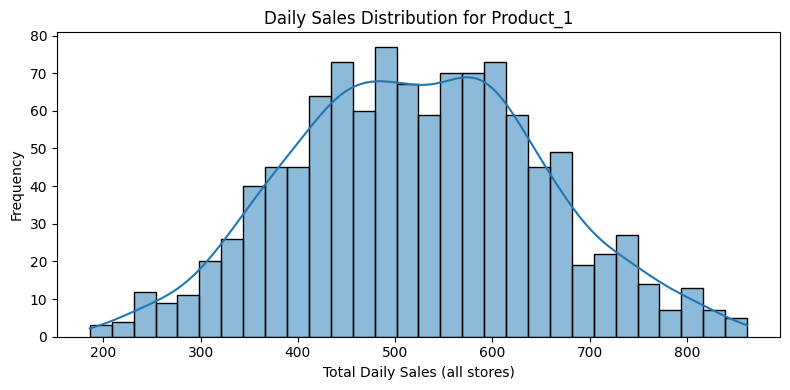

--- Product_2 ---
Shapiro–Wilk: stat = 0.9961, p = 0.0078
Anderson–Darling: stat = 0.8210
  At 15.0% → CV = 0.5740
  At 10.0% → CV = 0.6540
  At 5.0% → CV = 0.7840
  At 2.5% → CV = 0.9150
  At 1.0% → CV = 1.0880



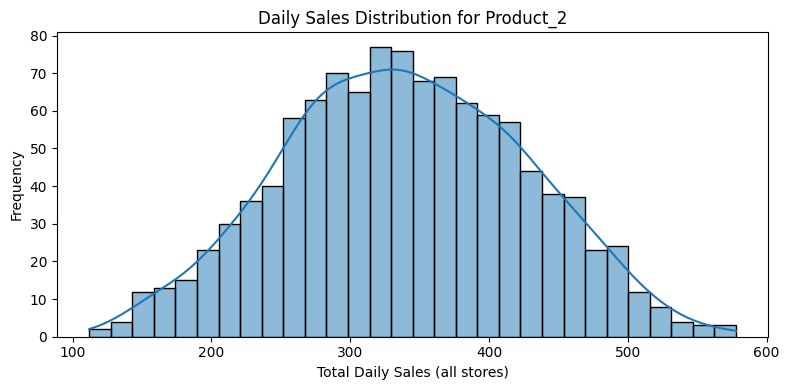

--- Product_3 ---
Shapiro–Wilk: stat = 0.9943, p = 0.0004
Anderson–Darling: stat = 0.9541
  At 15.0% → CV = 0.5740
  At 10.0% → CV = 0.6540
  At 5.0% → CV = 0.7840
  At 2.5% → CV = 0.9150
  At 1.0% → CV = 1.0880



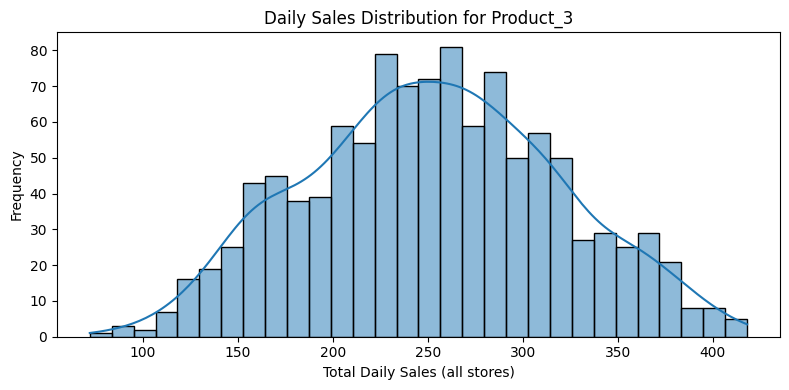

--- Product_4 ---
Shapiro–Wilk: stat = 0.9970, p = 0.0357
Anderson–Darling: stat = 0.6288
  At 15.0% → CV = 0.5740
  At 10.0% → CV = 0.6540
  At 5.0% → CV = 0.7840
  At 2.5% → CV = 0.9150
  At 1.0% → CV = 1.0880



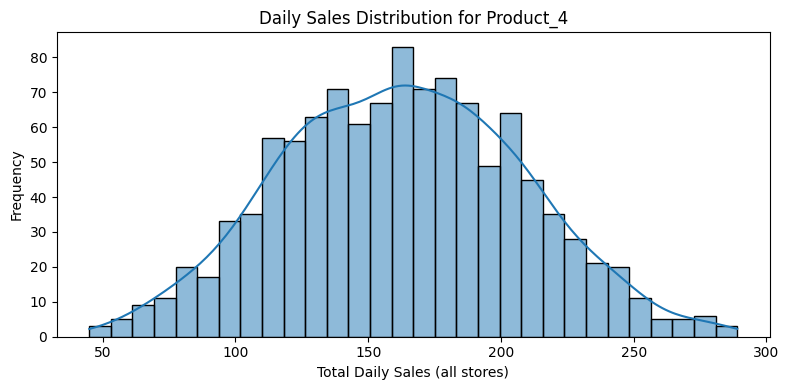

--- Product_5 ---
Shapiro–Wilk: stat = 0.9970, p = 0.0360
Anderson–Darling: stat = 0.4532
  At 15.0% → CV = 0.5740
  At 10.0% → CV = 0.6540
  At 5.0% → CV = 0.7840
  At 2.5% → CV = 0.9150
  At 1.0% → CV = 1.0880



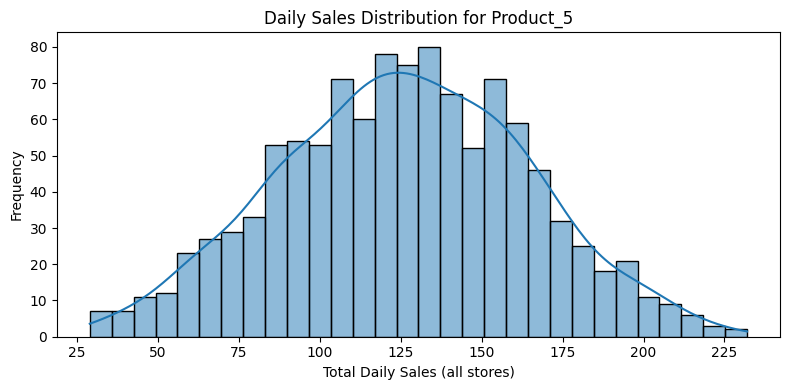

--- Product_6 ---
Shapiro–Wilk: stat = 0.9967, p = 0.0200
Anderson–Darling: stat = 0.6321
  At 15.0% → CV = 0.5740
  At 10.0% → CV = 0.6540
  At 5.0% → CV = 0.7840
  At 2.5% → CV = 0.9150
  At 1.0% → CV = 1.0880



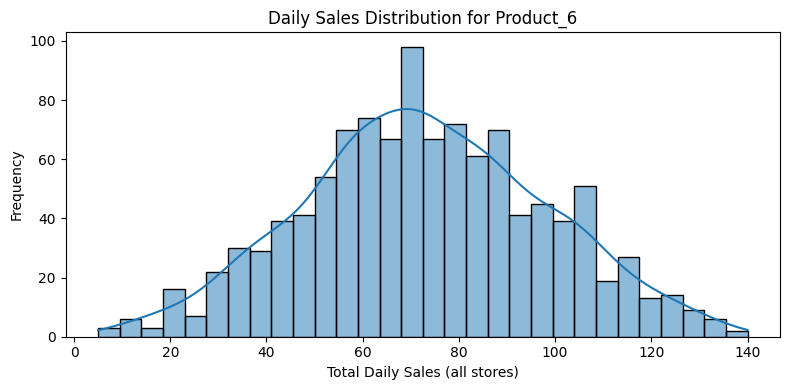

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Aggregate daily sales across all stores for each product
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
daily_prod = (
    merged_data
    .groupby(['Date', 'Product'])['Sales']
    .sum()
    .reset_index()
)
print(daily_prod)
# For each product, perform normality tests on its daily total-sales series 
products = daily_prod['Product'].unique()
normality_results = {}

for product in products:
    series = daily_prod.loc[daily_prod['Product'] == product, 'Sales']
    
    # Shapiro–Wilk
    sw_stat, sw_p = stats.shapiro(series)
    # Anderson–Darling
    ad_res = stats.anderson(series, dist='norm')
    
    normality_results[product] = {
        'Shapiro': {'stat': sw_stat, 'p': sw_p},
        'Anderson': {
            'stat': ad_res.statistic,
            'critical_values': ad_res.critical_values,
            'significance_levels': ad_res.significance_level
        }
    }
    
    print(f"--- {product} ---")
    print(f"Shapiro–Wilk: stat = {sw_stat:.4f}, p = {sw_p:.4f}")
    print(f"Anderson–Darling: stat = {ad_res.statistic:.4f}")
    for sl, cv in zip(ad_res.significance_level, ad_res.critical_values):
        print(f"  At {sl:.1f}% → CV = {cv:.4f}")
    print()

    # Visualize the distribution of the aggregated daily sales
    plt.figure(figsize=(8,4))
    sns.histplot(series, kde=True, bins=30)
    plt.title(f"Daily Sales Distribution for {product}")
    plt.xlabel("Total Daily Sales (all stores)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


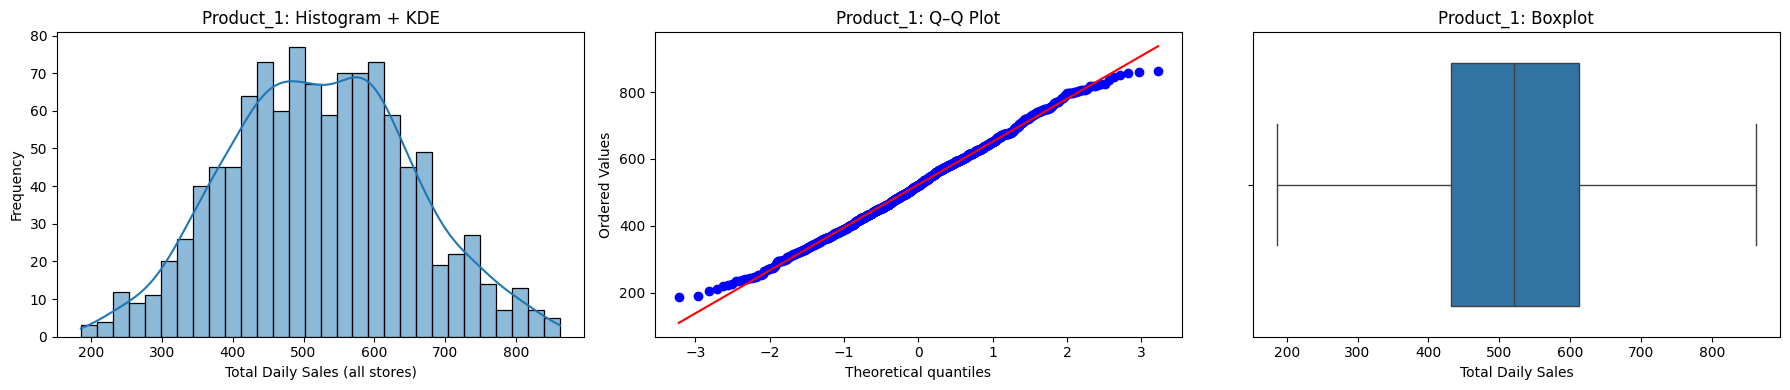

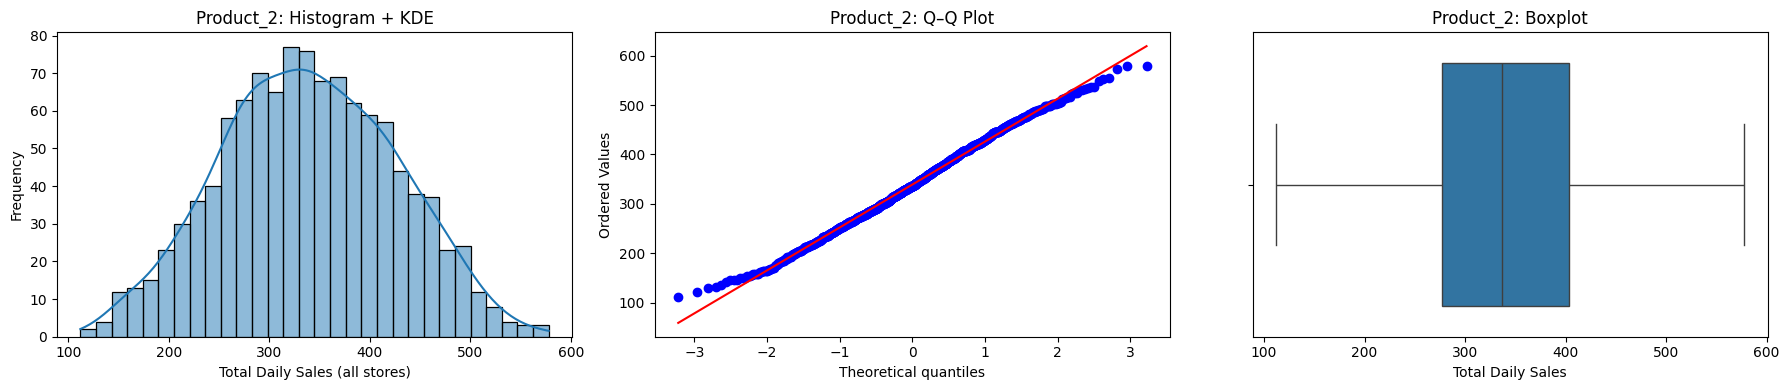

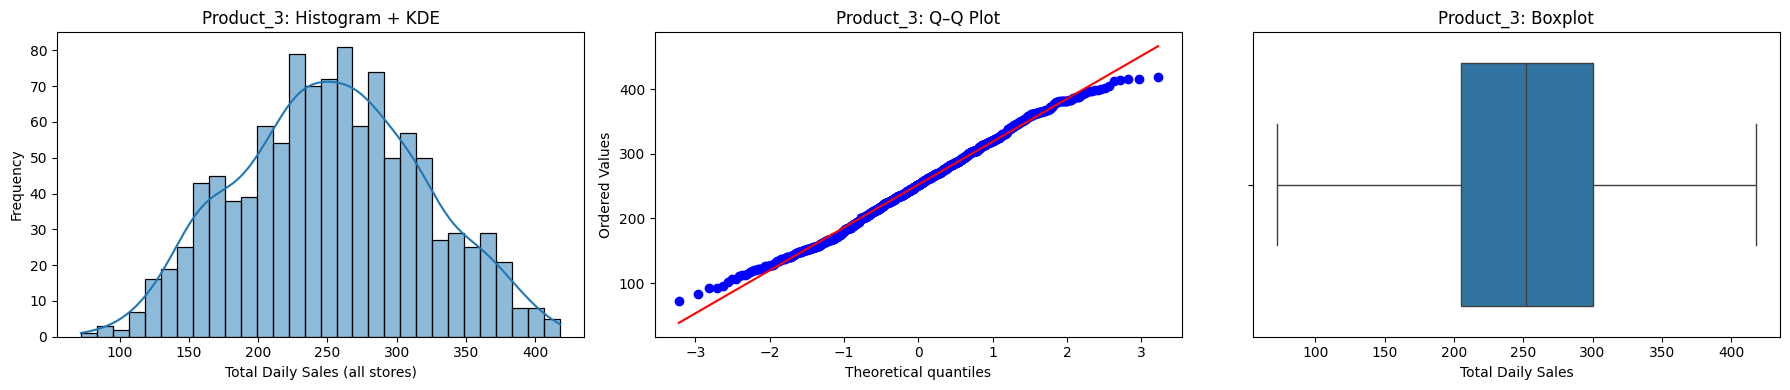

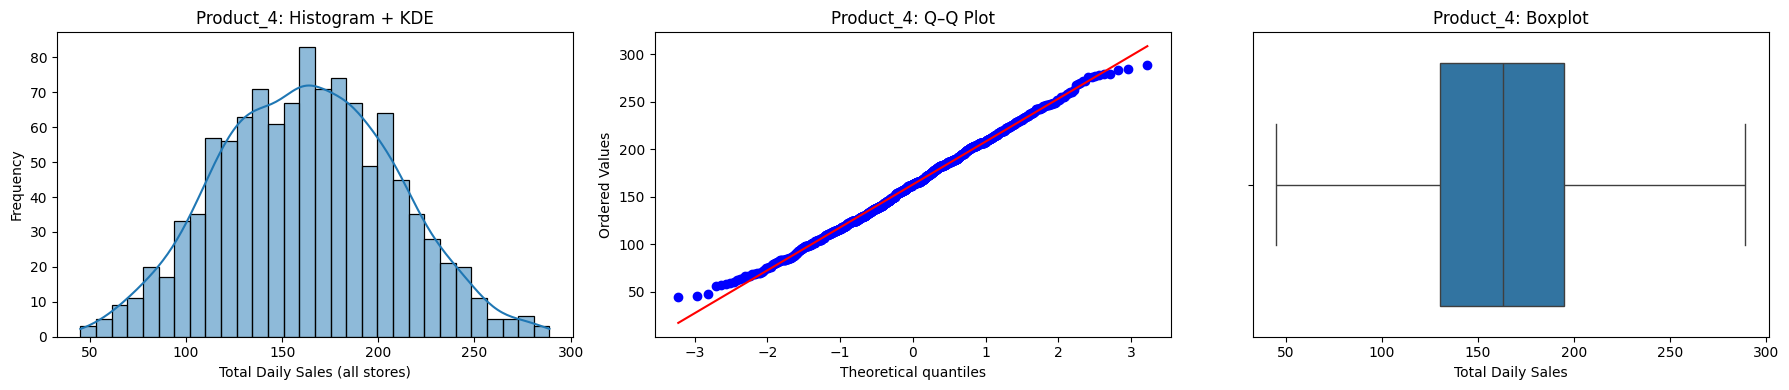

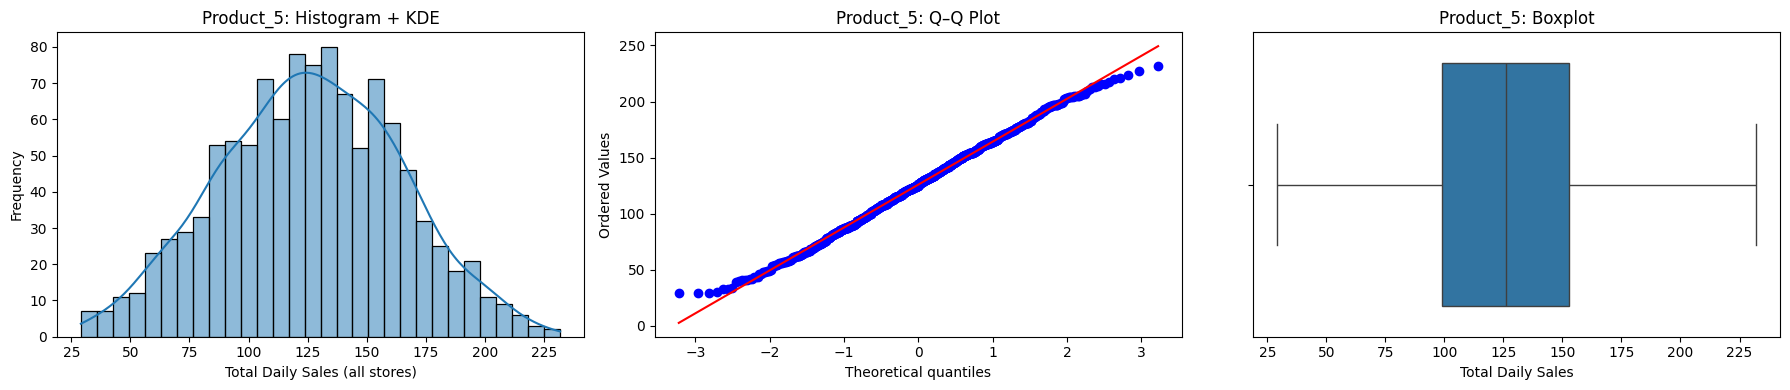

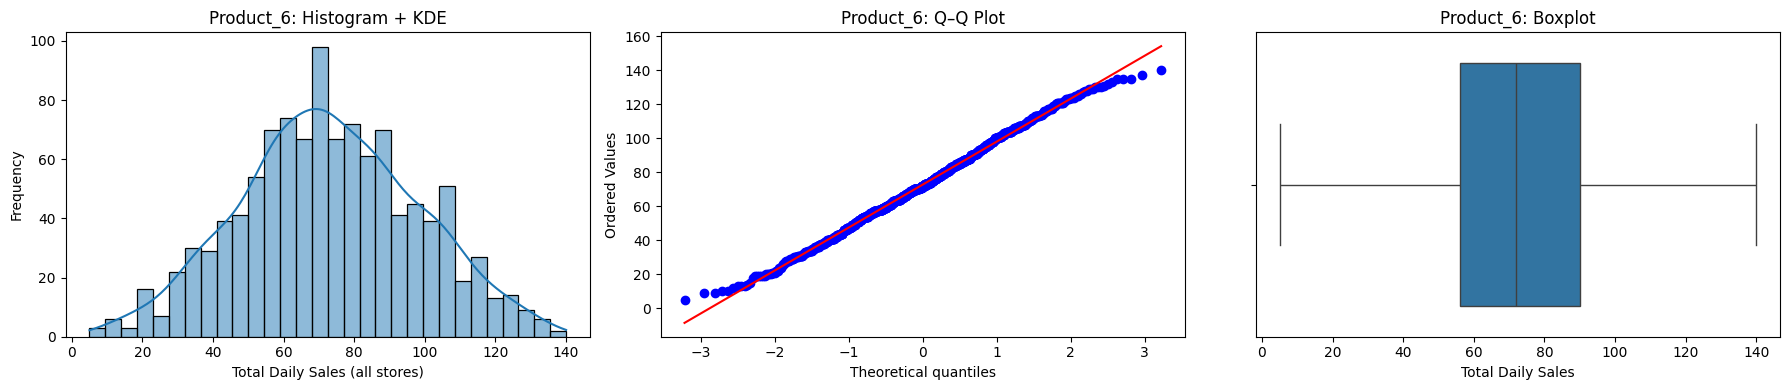

In [10]:
# Aggregate daily sales across all stores for each product
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
daily_prod = (
    merged_data
    .groupby(['Date', 'Product'])['Sales']
    .sum()
    .reset_index()
)

# visualizations (Histogram+KDE, Q–Q, Box)
products = daily_prod['Product'].unique()

for product in products:
    series = daily_prod.loc[daily_prod['Product'] == product, 'Sales']
    
    # --- Plots ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    
    # Histogram + KDE
    sns.histplot(series, kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"{product}: Histogram + KDE")
    axes[0].set_xlabel("Total Daily Sales (all stores)")
    axes[0].set_ylabel("Frequency")
    
    # Q–Q Plot
    stats.probplot(series, dist="norm", plot=axes[1])
    axes[1].set_title(f"{product}: Q–Q Plot")
    
    # Boxplot
    sns.boxplot(x=series, ax=axes[2])
    axes[2].set_title(f"{product}: Boxplot")
    axes[2].set_xlabel("Total Daily Sales")
    
    plt.tight_layout()
    plt.show()


In [11]:
# Total and Average Sales per Product for Each Store
sales_summary = merged_data.groupby(['Store', 'Product']).agg(
    Total_Sales=pd.NamedAgg(column='Sales', aggfunc='sum'),
    Average_Sales=pd.NamedAgg(column='Sales', aggfunc='mean')
).reset_index()

print("Sales Summary by Store and Product:")
print(sales_summary)

Sales Summary by Store and Product:
      Store    Product  Total_Sales  Average_Sales
0   Store_A  Product_1       193593     176.797260
1   Store_A  Product_2       123677     112.947032
2   Store_A  Product_3        91783      83.820091
3   Store_A  Product_4        59878      54.683105
4   Store_A  Product_5        46836      42.772603
5   Store_A  Product_6        26623      24.313242
6   Store_B  Product_1       189893     173.418265
7   Store_B  Product_2       123422     112.714155
8   Store_B  Product_3        92962      84.896804
9   Store_B  Product_4        59696      54.516895
10  Store_B  Product_5        45038      41.130594
11  Store_B  Product_6        26525      24.223744
12  Store_C  Product_1       189861     173.389041
13  Store_C  Product_2       124330     113.543379
14  Store_C  Product_3        91723      83.765297
15  Store_C  Product_4        58724      53.629224
16  Store_C  Product_5        46040      42.045662
17  Store_C  Product_6        26604      24.29

In [12]:
# Create pivot tables for a clearer tabular view:
pivot_total = sales_summary.pivot(index='Product', columns='Store', values='Total_Sales')
pivot_avg = sales_summary.pivot(index='Product', columns='Store', values='Average_Sales')

print("\nPivot Table: Total Sales per Product for each Store:")
print(pivot_total)

print("\nPivot Table: Average Sales per Product for each Store:")
print(pivot_avg)


Pivot Table: Total Sales per Product for each Store:
Store      Store_A  Store_B  Store_C
Product                             
Product_1   193593   189893   189861
Product_2   123677   123422   124330
Product_3    91783    92962    91723
Product_4    59878    59696    58724
Product_5    46836    45038    46040
Product_6    26623    26525    26604

Pivot Table: Average Sales per Product for each Store:
Store         Store_A     Store_B     Store_C
Product                                      
Product_1  176.797260  173.418265  173.389041
Product_2  112.947032  112.714155  113.543379
Product_3   83.820091   84.896804   83.765297
Product_4   54.683105   54.516895   53.629224
Product_5   42.772603   41.130594   42.045662
Product_6   24.313242   24.223744   24.295890


In [13]:
# Total and Average Sales per Day Across All Stores
daily_summary = merged_data.groupby('Date').agg(
    Total_Sales=pd.NamedAgg(column='Sales', aggfunc='sum'),
    Average_Sales=pd.NamedAgg(column='Sales', aggfunc='mean')
).reset_index()

print("\nDaily Sales Summary (All Stores):")
print(daily_summary.head())  # Displaying first few rows



Daily Sales Summary (All Stores):
        Date  Total_Sales  Average_Sales
0 2021-01-01         1312      72.888889
1 2021-01-02         1648      91.555556
2 2021-01-03         1771      98.388889
3 2021-01-04         1646      91.444444
4 2021-01-05         1573      87.388889


In [14]:
# Identifying the Most and Least Profitable Products

# Calculate Profit per Unit assuming profit = Selling_Price - Cost_Price.
merged_data['Profit_per_Unit'] = merged_data['Selling Price'] - merged_data['Cost Price']

# Calculate Profit for each row (daily profit for that product).
merged_data['Profit'] = merged_data['Profit_per_Unit'] * merged_data['Sales']

# Sum total profit per product (aggregated over all stores and days)
profit_summary = merged_data.groupby('Product').agg(
    Total_Profit=pd.NamedAgg(column='Profit', aggfunc='sum')
).reset_index()

# Daily Profit per Product and Store
daily_profit_summary = merged_data.groupby(['Date', 'Store', 'Product']).agg(
    Daily_Profit=pd.NamedAgg(column='Profit', aggfunc='sum')
).reset_index()

print("\nDaily Profit Summary (per Product and Store):")
print(daily_profit_summary)

# Cumulative Profit per Product and Store
daily_profit_summary = daily_profit_summary.sort_values(by=['Store', 'Product', 'Date'])

# Calculate cumulative profit per product and store
daily_profit_summary['Cumulative_Profit'] = daily_profit_summary.groupby(['Store', 'Product'])['Daily_Profit'].cumsum()

print("\nCumulative Profit Summary (per Product and Store):")
print(daily_profit_summary)

# Sort to identify the most and least profitable products.
most_profitable = profit_summary.sort_values(by='Total_Profit', ascending=False).iloc[0]
least_profitable = profit_summary.sort_values(by='Total_Profit', ascending=True).iloc[0]

print("\nProfit Summary per Product:")
print(profit_summary)

print("\nMost Profitable Product:")
print(most_profitable)

print("\nLeast Profitable Product:")
print(least_profitable)


Daily Profit Summary (per Product and Store):
            Date    Store    Product  Daily_Profit
0     2021-01-01  Store_A  Product_1       2249.10
1     2021-01-01  Store_A  Product_2       2521.88
2     2021-01-01  Store_A  Product_3        964.86
3     2021-01-01  Store_A  Product_4        436.45
4     2021-01-01  Store_A  Product_5       1256.40
...          ...      ...        ...           ...
19705 2023-12-31  Store_C  Product_2       3161.76
19706 2023-12-31  Store_C  Product_3       1162.78
19707 2023-12-31  Store_C  Product_4        349.16
19708 2023-12-31  Store_C  Product_5       2443.00
19709 2023-12-31  Store_C  Product_6         82.34

[19710 rows x 4 columns]

Cumulative Profit Summary (per Product and Store):
            Date    Store    Product  Daily_Profit  Cumulative_Profit
0     2021-01-01  Store_A  Product_1       2249.10            2249.10
18    2021-01-02  Store_A  Product_1      12120.15           14369.25
36    2021-01-03  Store_A  Product_1       4373.25   

In [15]:
# Save the summary tables to CSV files for reporting
sales_summary.to_csv("sales_summary_by_store_product.csv", index=False)
daily_summary.to_csv("daily_sales_summary.csv", index=False)
profit_summary.to_csv("profit_summary_by_product.csv", index=False)
daily_profit_summary.to_csv("daily_cumulative_profit_summary.csv", index=False)


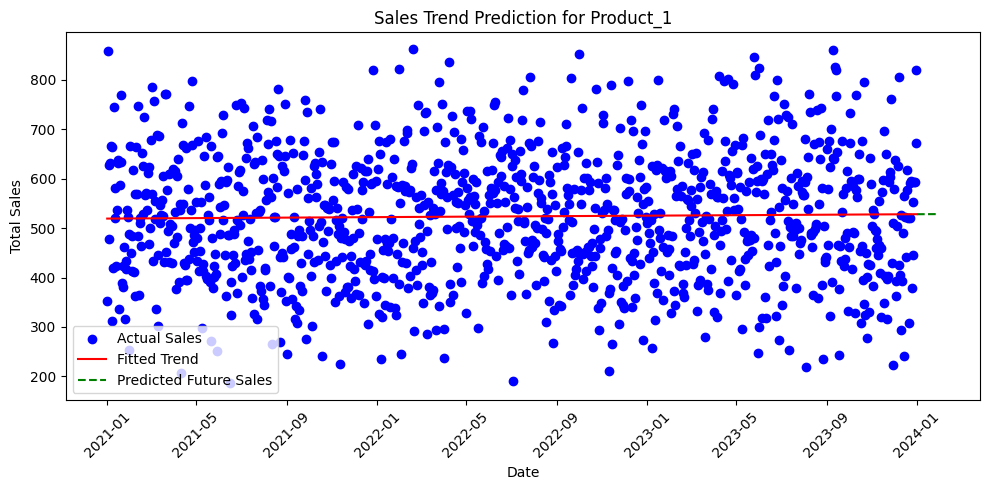

--- Product_1 Linear Regression Model ---
Coefficient: 0.0081, Intercept: -5440.0651
Future Sales Predictions (first 5 rows):
        Date  Predicted_Sales
0 2024-01-01       528.030847
1 2024-01-02       528.038924
2 2024-01-03       528.047001
3 2024-01-04       528.055078
4 2024-01-05       528.063155 



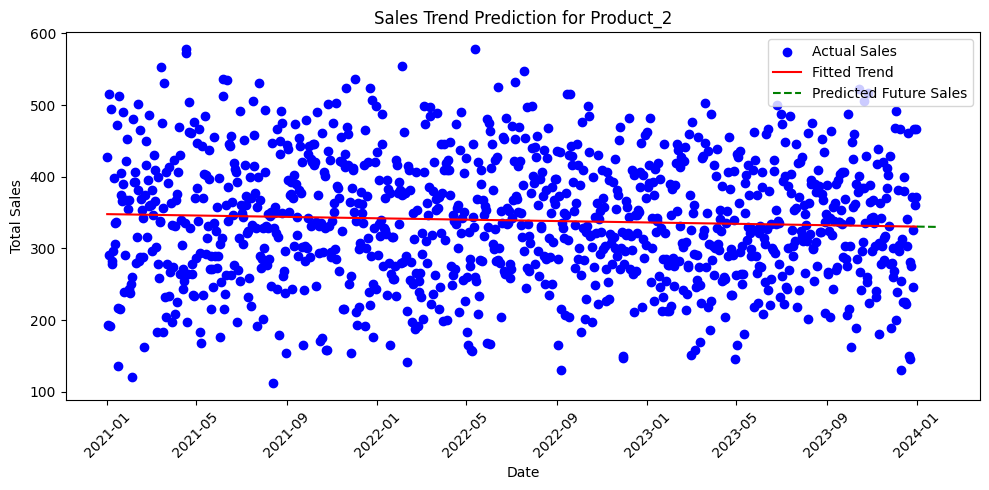

--- Product_2 Linear Regression Model ---
Coefficient: -0.0159, Intercept: 12051.8264
Future Sales Predictions (first 5 rows):
        Date  Predicted_Sales
0 2024-01-01       330.511370
1 2024-01-02       330.495507
2 2024-01-03       330.479643
3 2024-01-04       330.463780
4 2024-01-05       330.447916 



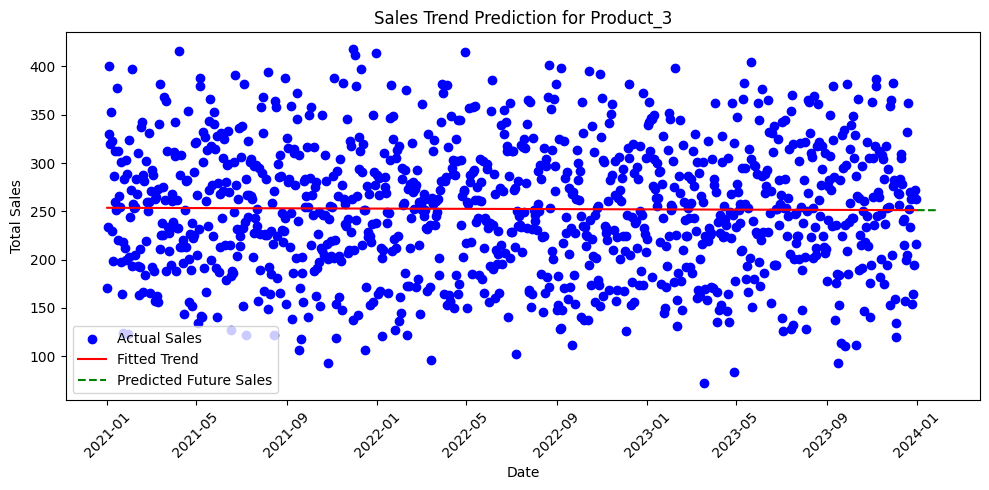

--- Product_3 Linear Regression Model ---
Coefficient: -0.0022, Intercept: 1885.1595
Future Sales Predictions (first 5 rows):
        Date  Predicted_Sales
0 2024-01-01       251.270406
1 2024-01-02       251.268195
2 2024-01-03       251.265984
3 2024-01-04       251.263773
4 2024-01-05       251.261561 



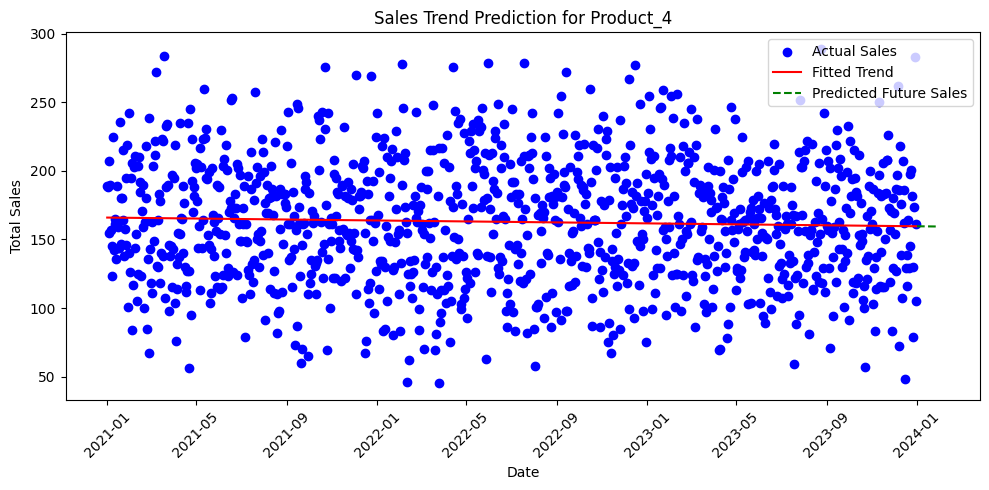

--- Product_4 Linear Regression Model ---
Coefficient: -0.0058, Intercept: 4442.7504
Future Sales Predictions (first 5 rows):
        Date  Predicted_Sales
0 2024-01-01       159.652634
1 2024-01-02       159.646837
2 2024-01-03       159.641041
3 2024-01-04       159.635244
4 2024-01-05       159.629447 



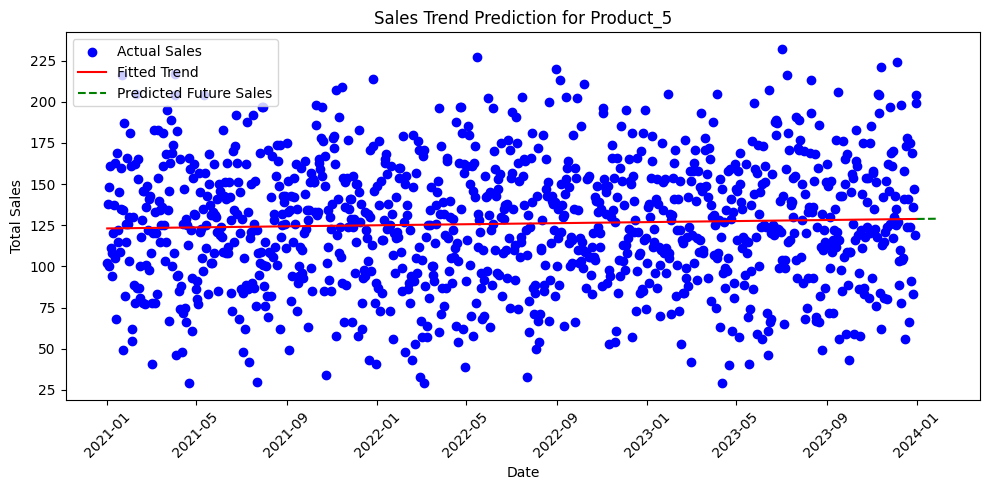

--- Product_5 Linear Regression Model ---
Coefficient: 0.0053, Intercept: -3754.0005
Future Sales Predictions (first 5 rows):
        Date  Predicted_Sales
0 2024-01-01       128.828586
1 2024-01-02       128.833841
2 2024-01-03       128.839096
3 2024-01-04       128.844351
4 2024-01-05       128.849606 



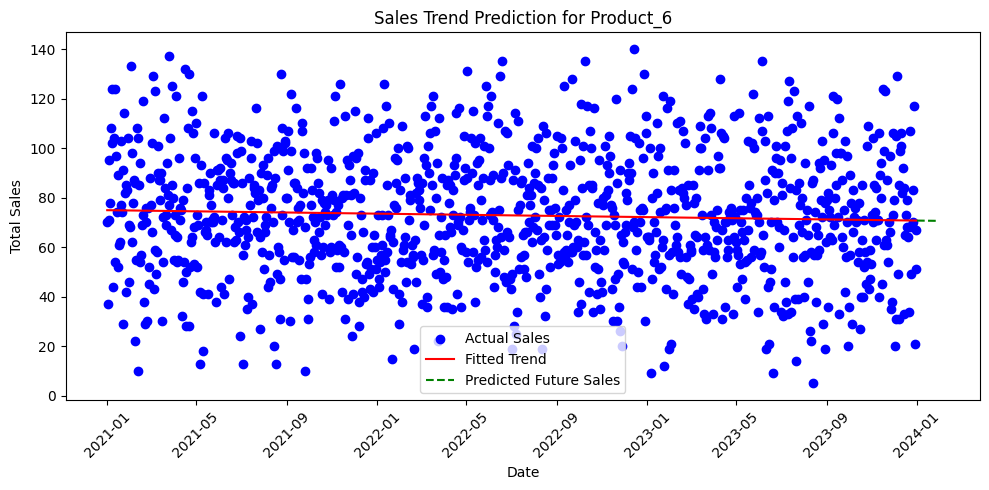

--- Product_6 Linear Regression Model ---
Coefficient: -0.0038, Intercept: 2902.1257
Future Sales Predictions (first 5 rows):
        Date  Predicted_Sales
0 2024-01-01        70.732954
1 2024-01-02        70.729122
2 2024-01-03        70.725290
3 2024-01-04        70.721458
4 2024-01-05        70.717626 



In [15]:
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Predictive Modeling (Linear Regression)

# Get the list of unique products
products = merged_data['Product'].unique()

models = {}
predictions = {}

for product in products:
    product_data = merged_data[merged_data['Product'] == product]
    
    # Aggregate total daily sales across all stores for this product
    daily_sales = product_data.groupby('Date').agg(Total_Sales=('Sales', 'sum')).reset_index()

    # Convert dates to a numeric format
    daily_sales['Date_Ordinal'] = daily_sales['Date'].map(datetime.toordinal)
    
    #code adapted from  scikit-learn developers, 2019
    # Define the independent variable (X) and the target (y)
    X = daily_sales[['Date_Ordinal']]
    y = daily_sales['Total_Sales']
    
    # Build and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    models[product] = model
    
    # Generate predictions for the fitted period
    fitted_sales = model.predict(X)
    
    # Create future dates for prediction. next 30 days.
    last_date = daily_sales['Date'].max()
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
    
    # Convert future_dates to a DataFrame with the same column name 'Date_Ordinal'
    future_dates_ordinal = pd.DataFrame({
        'Date_Ordinal': future_dates.map(datetime.toordinal)
    })
    
    # Generate predictions for the future dates
    future_predictions = model.predict(future_dates_ordinal)
    
    # Save future predictions in a DataFrame and store it in the dictionary
    predictions[product] = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Sales': future_predictions
    })
    
    #code adapted from  scikit-learn Pedigo, 2025
    # Plot actual sales, the fitted regression trend, and future predictions
    plt.figure(figsize=(10, 5))
    plt.scatter(daily_sales['Date'], daily_sales['Total_Sales'], color='blue', label='Actual Sales')
    plt.plot(daily_sales['Date'], fitted_sales, color='red', label='Fitted Trend')
    plt.plot(future_dates, future_predictions, color='green', linestyle='--', label='Predicted Future Sales')
    plt.title(f"Sales Trend Prediction for {product}")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # print the model coefficients and prediction sample
    print(f"--- {product} Linear Regression Model ---")
    print(f"Coefficient: {model.coef_[0]:.4f}, Intercept: {model.intercept_:.4f}")
    print("Future Sales Predictions (first 5 rows):")
    print(predictions[product].head(), "\n")

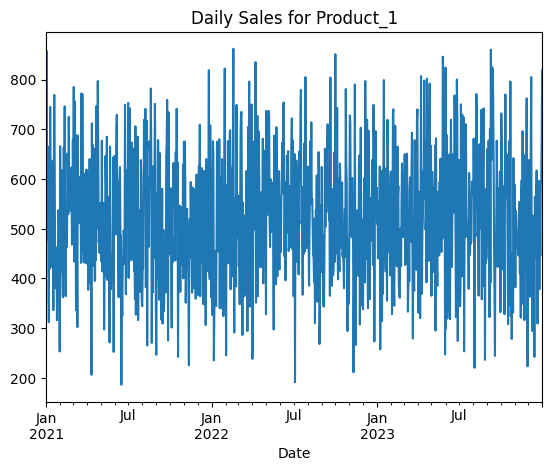

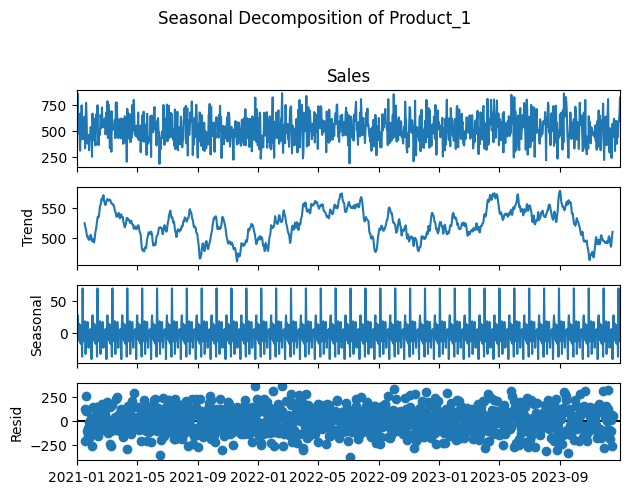

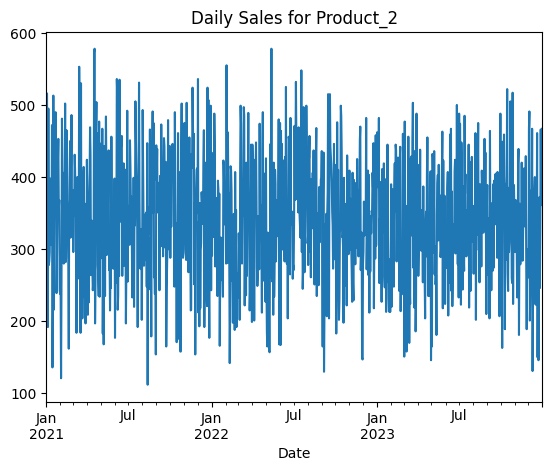

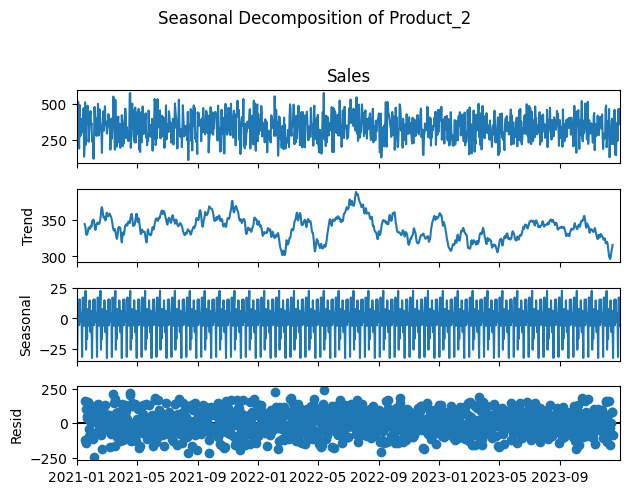

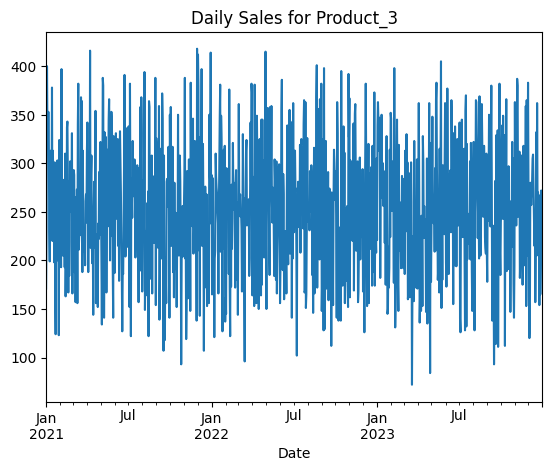

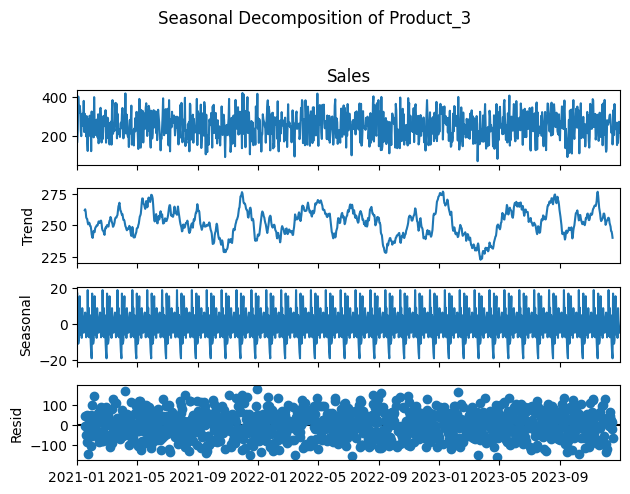

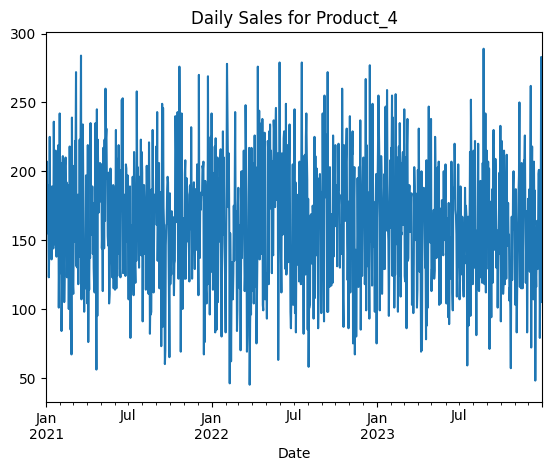

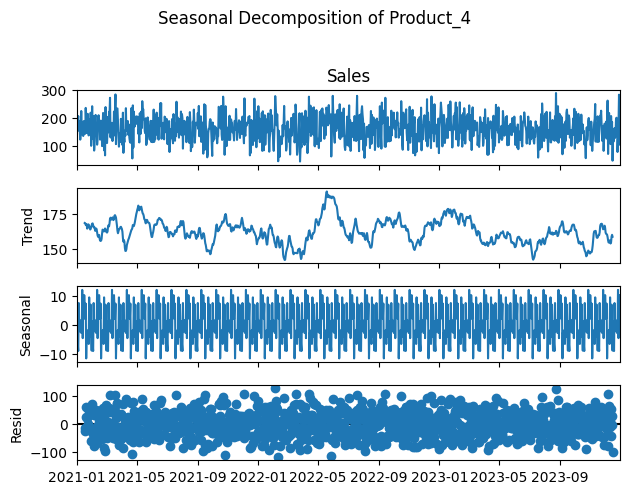

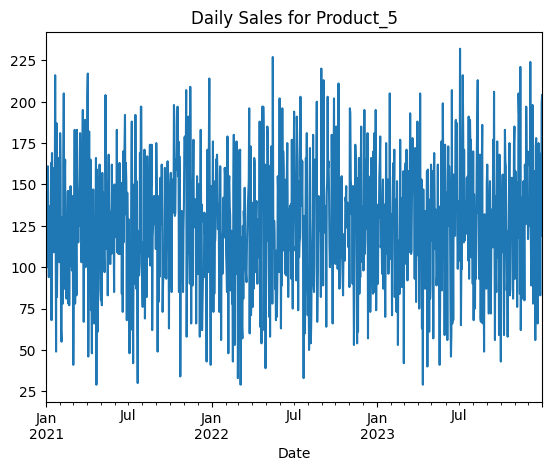

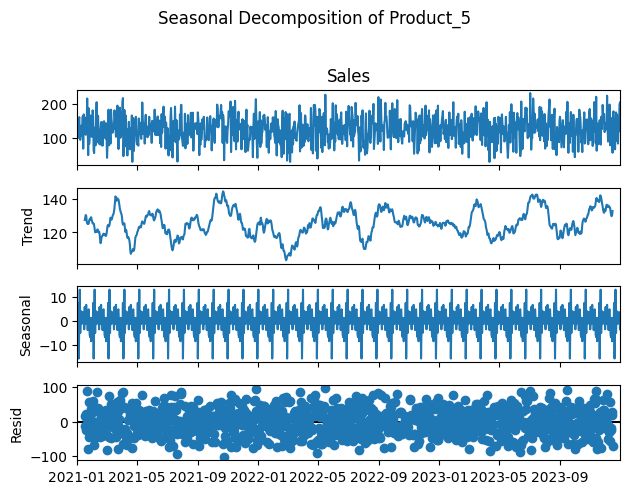

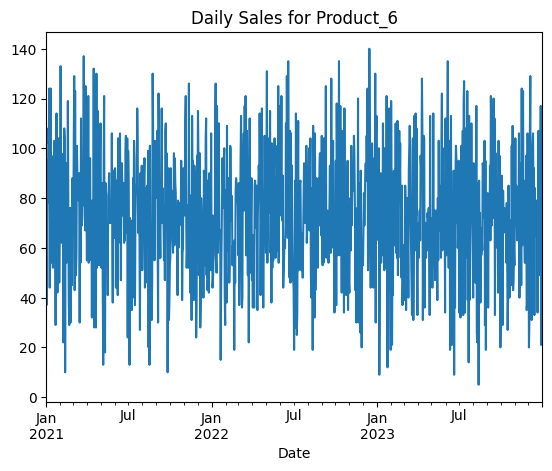

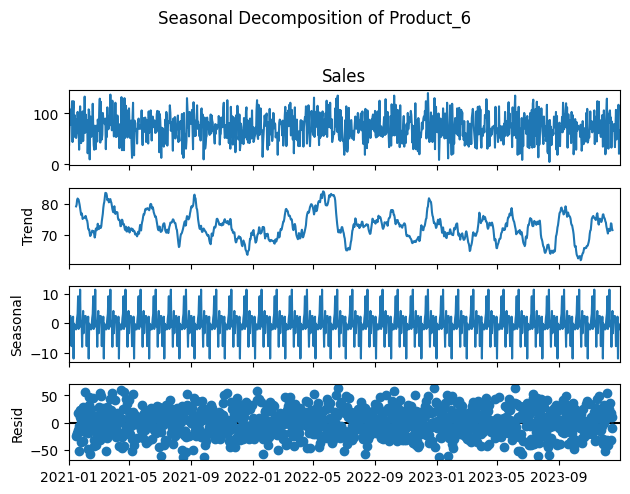

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

products = merged_data['Product'].unique()

for product in products:
    ts = (merged_data[merged_data['Product'] == product]
          .groupby('Date')['Sales']
          .sum()
          .asfreq('D')            # impose a daily index
          .fillna(0))             
    
    ts.plot(title=f"Daily Sales for {product}");

    # code adapted from Mutha, 2023
    # decompose with period=30 (monthly cycle)
    decomp = seasonal_decompose(ts, model='additive', period=30)
    
    # plot
    fig = decomp.plot()
    fig.suptitle(f'Seasonal Decomposition of {product}', y=1.02)
    plt.tight_layout()
    plt.show()


=== Product_1 ===
ADF Statistic: -32.609433
p-value:        0
The time series is likely **stationary** (reject H0).

After one seasonal-difference
ADF Statistic: -32.181370
p-value:        0
The time series is likely **stationary** (reject H0).


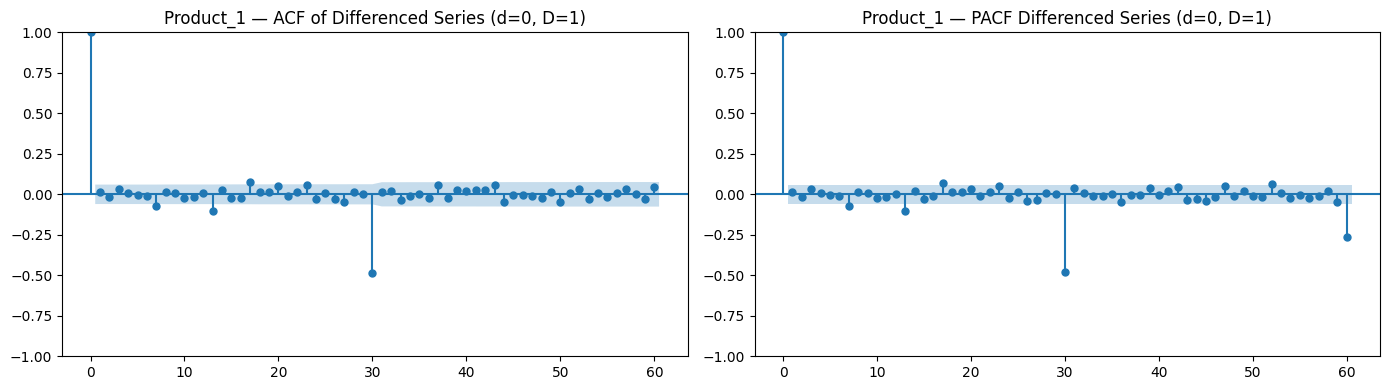


=== Product_2 ===
ADF Statistic: -18.042385
p-value:        2.65522e-30
The time series is likely **stationary** (reject H0).

After one seasonal-difference
ADF Statistic: -8.094698
p-value:        1.34885e-12
The time series is likely **stationary** (reject H0).


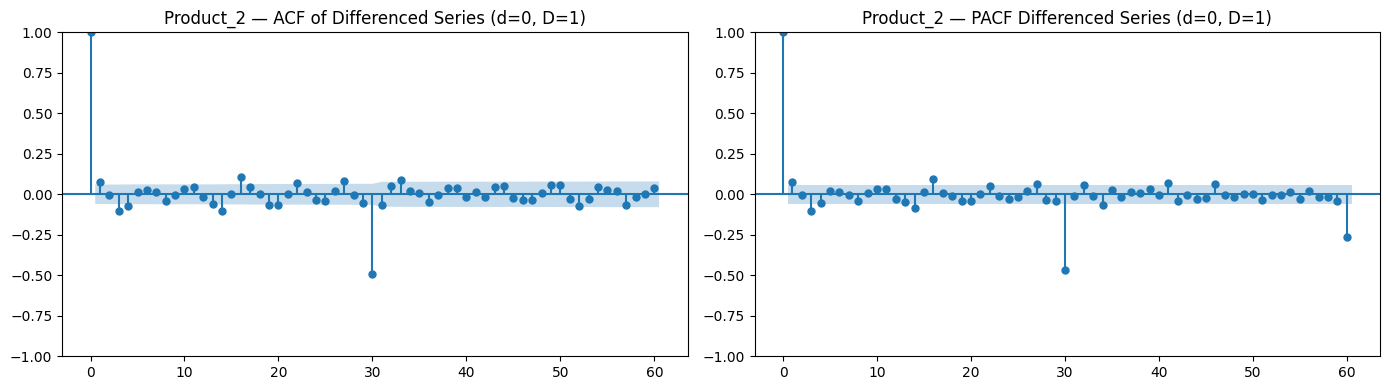


=== Product_3 ===
ADF Statistic: -20.307694
p-value:        0
The time series is likely **stationary** (reject H0).

After one seasonal-difference
ADF Statistic: -24.220825
p-value:        0
The time series is likely **stationary** (reject H0).


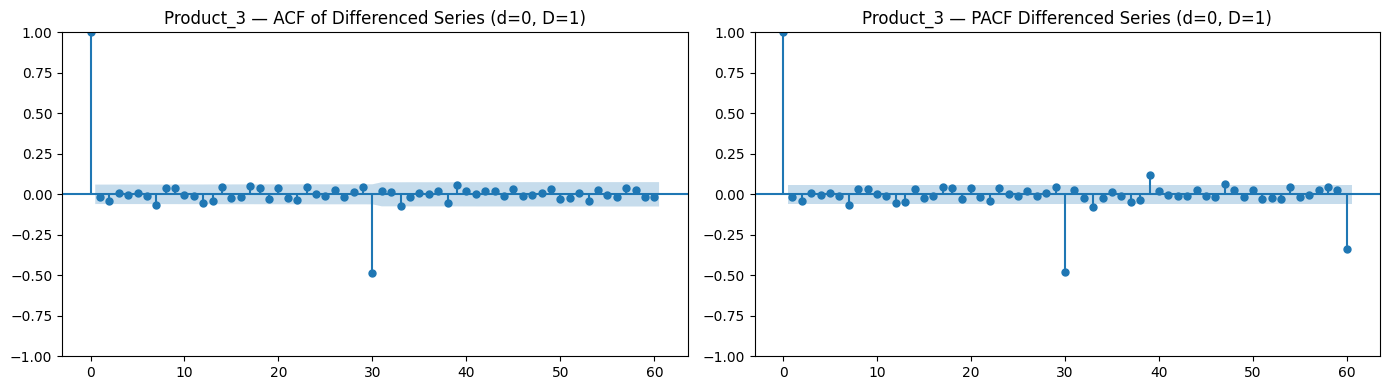


=== Product_4 ===
ADF Statistic: -32.471864
p-value:        0
The time series is likely **stationary** (reject H0).

After one seasonal-difference
ADF Statistic: -13.396100
p-value:        4.66404e-25
The time series is likely **stationary** (reject H0).


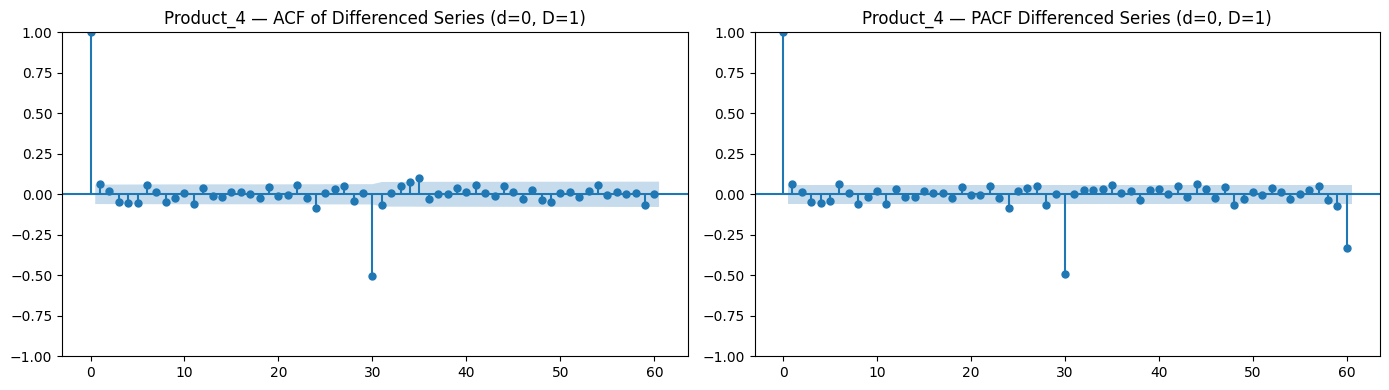


=== Product_5 ===
ADF Statistic: -31.543180
p-value:        0
The time series is likely **stationary** (reject H0).

After one seasonal-difference
ADF Statistic: -30.185193
p-value:        0
The time series is likely **stationary** (reject H0).


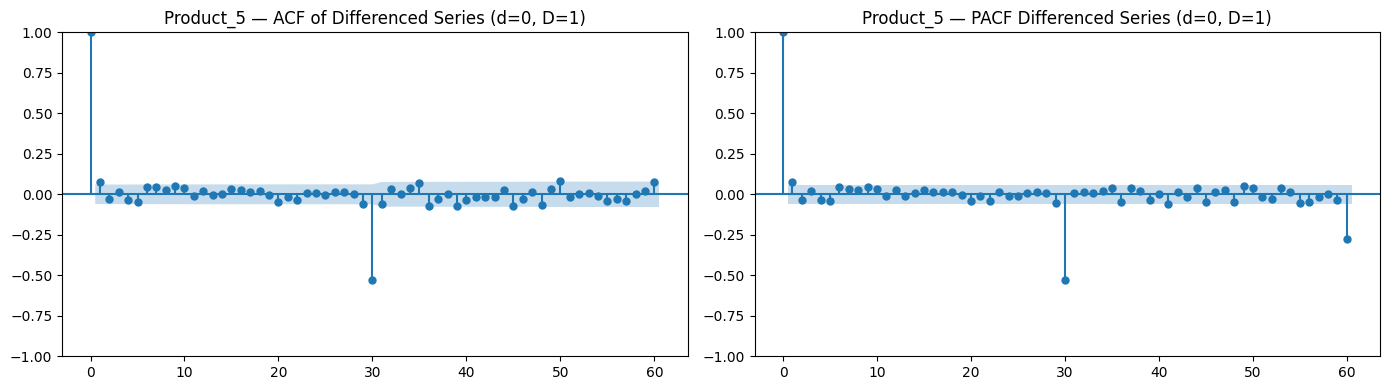


=== Product_6 ===
ADF Statistic: -14.996038
p-value:        1.10734e-27
The time series is likely **stationary** (reject H0).

After one seasonal-difference
ADF Statistic: -10.891379
p-value:        1.22267e-19
The time series is likely **stationary** (reject H0).


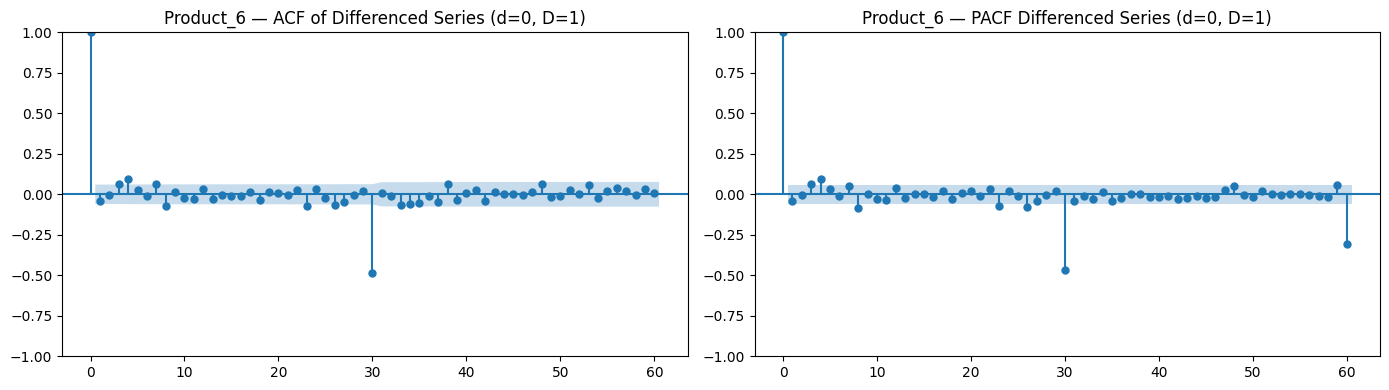

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# loop over each product
products = merged_data['Product'].unique()

for product in products:
    ts = (merged_data[merged_data['Product'] == product]
          .groupby('Date')['Sales']
          .sum()
          .asfreq('D')
          .fillna(0))
    
        # code adapted from Mutha, 2023
     # Test raw series for non-seasonal stationarity
    result = adfuller(ts)
    print(f"\n=== {product} ===")
    print(f"ADF Statistic: {result[0]:.6f}")
    print(f"p-value:        {result[1]:.6g}")
    if result[1] < 0.05:
        print("The time series is likely **stationary** (reject H0).")
    else:
        print("The time series is likely **non-stationary** (fail to reject H0).")
    
    #code adapted from GeeksforGeeks, 2024
    # Test once-seasonal-difference for seasonal stationarity
    ts_seasonal_diff   = ts.diff(30).dropna()
    result = adfuller(ts_seasonal_diff)   
    print(f"\nAfter one seasonal-difference")
    print(f"ADF Statistic: {result[0]:.6f}")
    print(f"p-value:        {result[1]:.6g}")
    if result[1] < 0.05:
        print("The time series is likely **stationary** (reject H0).")
    else:
        print("The time series is likely **non-stationary** (fail to reject H0).")
    
    #code adapted from Statsmodels.graphics.tsaplots.plot_acf - Statsmodels ,2024
    # Plot ACF & PACF
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(ts_seasonal_diff, lags=60, ax=axes[0])
    plot_pacf(ts_seasonal_diff, lags=60, ax=axes[1])
    axes[0].set_title(f'{product} — ACF of Differenced Series (d=0, D=1)')
    axes[1].set_title(f'{product} — PACF Differenced Series (d=0, D=1)')
    plt.tight_layout()
    plt.show()
    

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_results = {}

for product in products:
    #Build the series for this product
    ts = (merged_data[merged_data['Product'] == product]
          .groupby('Date')['Sales']
          .sum()
          .asfreq('D')  
          .fillna(0)) 
    
    #code adapted from Chan`s Jupyter, 2020
    # Fit the SARIMA(1,0,1)x(1,1,1,30)
    model = SARIMAX(ts,
                    order=(1, 0, 1),
                    seasonal_order=(1, 1, 1, 30),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    
    results = model.fit(disp=False)
    
    # Print a short summary header + AIC for quick comparison
    print(f"\n=== {product} ===")
    print(f"AIC: {results.aic:.2f}")
    print(results.summary())
    
    #Store the results object for later use
    sarima_results[product] = results

/home/jupyter-2418691@chester.ac-ea554/.local/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



=== Product_1 ===
AIC: 13056.57
                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 1095
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 30)   Log Likelihood               -6523.285
Date:                            Tue, 29 Apr 2025   AIC                          13056.571
Time:                                    04:55:58   BIC                          13081.272
Sample:                                01-01-2021   HQIC                         13065.944
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3178      0.739     -0.430      0.667      -1.766       1.131
ma

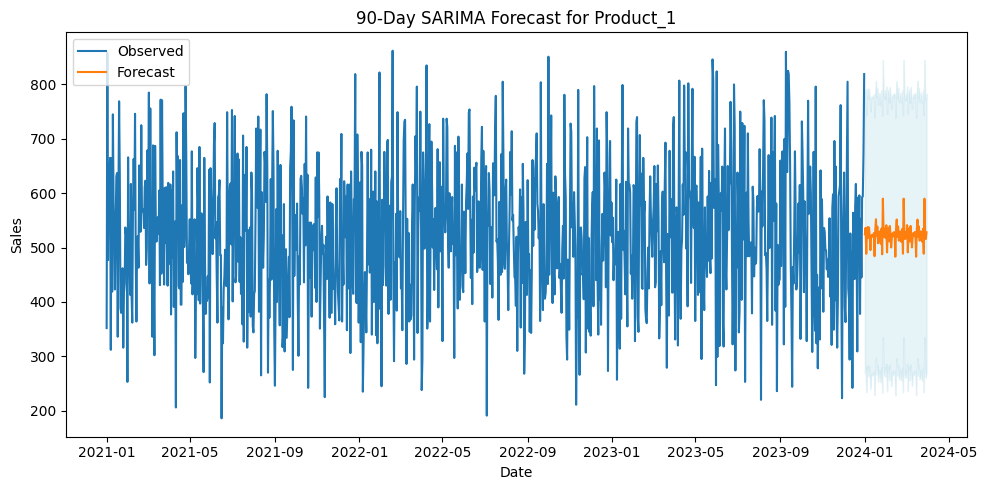


Forecast Table for Product_1:
        Date  Forecast_Sales    Lower_CI    Upper_CI
0 2024-01-01      524.482032  269.660353  779.303711
1 2024-01-02      536.258840  281.395853  791.121828
2 2024-01-03      488.507131  233.639970  743.374292
3 2024-01-04      527.746480  272.878898  782.614063
4 2024-01-05      537.794497  282.926872  792.662122


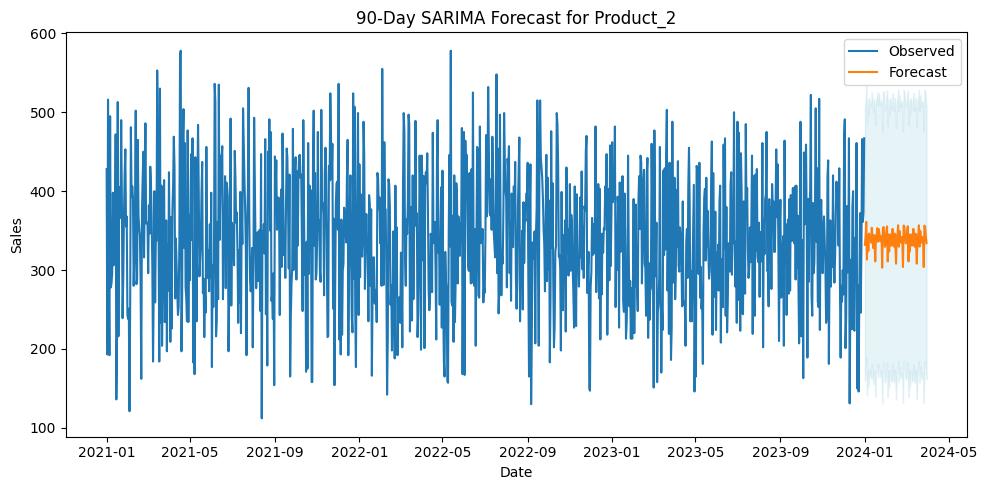


Forecast Table for Product_2:
        Date  Forecast_Sales    Lower_CI    Upper_CI
0 2024-01-01      331.888220  159.728869  504.047571
1 2024-01-02      342.788426  170.586455  514.990396
2 2024-01-03      361.041898  188.834457  533.249338
3 2024-01-04      313.256345  141.048202  485.464488
4 2024-01-05      343.744204  171.535971  515.952437


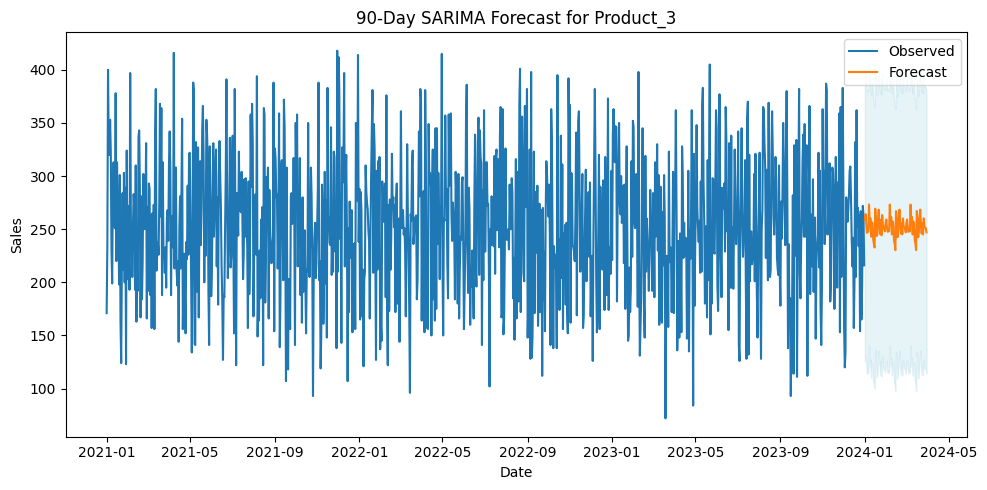


Forecast Table for Product_3:
        Date  Forecast_Sales    Lower_CI    Upper_CI
0 2024-01-01      258.477156  125.667006  391.287305
1 2024-01-02      264.176387  131.345642  397.007131
2 2024-01-03      255.235171  122.398381  388.071961
3 2024-01-04      246.525354  113.686790  379.363919
4 2024-01-05      248.735402  115.896317  381.574486


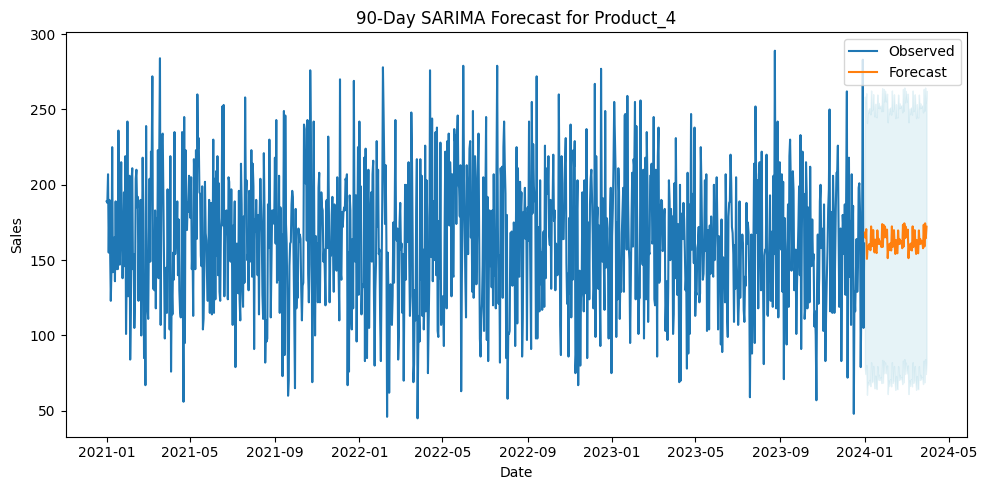


Forecast Table for Product_4:
        Date  Forecast_Sales   Lower_CI    Upper_CI
0 2024-01-01      168.319482  78.171240  258.467725
1 2024-01-02      164.640475  74.464530  254.816421
2 2024-01-03      170.581613  80.400224  260.763001
3 2024-01-04      150.848650  60.666191  241.031108
4 2024-01-05      159.270302  69.087634  249.452971


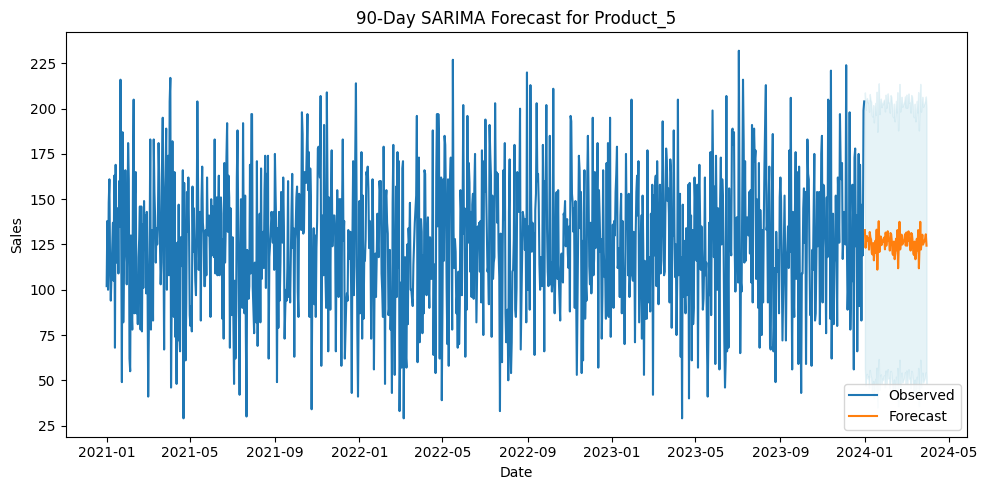


Forecast Table for Product_5:
        Date  Forecast_Sales   Lower_CI    Upper_CI
0 2024-01-01      132.955983  56.947985  208.963981
1 2024-01-02      123.184832  47.069514  199.300149
2 2024-01-03      128.946920  52.801742  205.092098
3 2024-01-04      129.668012  53.514522  205.821501
4 2024-01-05      127.191138  51.035335  203.346941


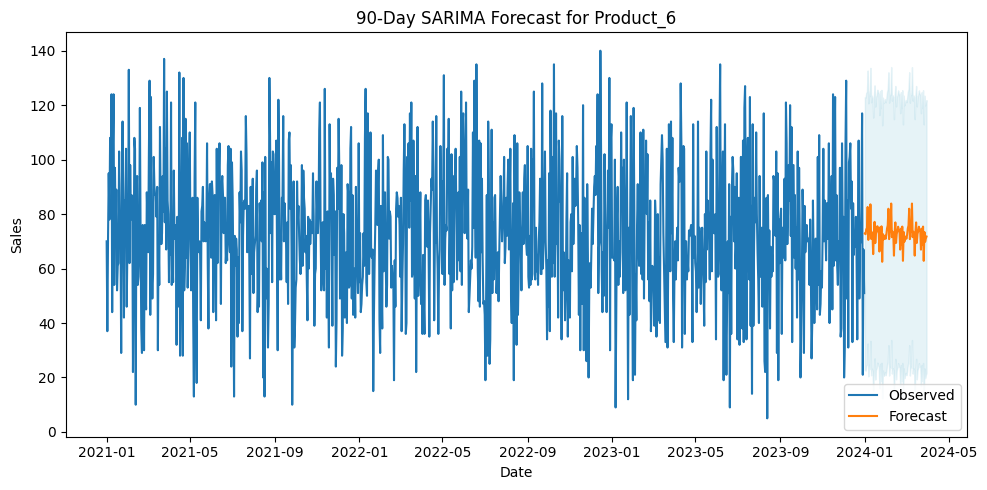


Forecast Table for Product_6:
        Date  Forecast_Sales   Lower_CI    Upper_CI
0 2024-01-01       72.855801  22.769498  122.942104
1 2024-01-02       72.627898  22.517348  122.738448
2 2024-01-03       74.458329  24.341666  124.574993
3 2024-01-04       74.778652  24.660446  124.896858
4 2024-01-05       82.617920  32.499325  132.736516


In [19]:
# frecast the next 90 days for each product
sarima_forecasts = {}
sarima_forecast_dfs = {}

n_steps = 90  # Number of days to forecast

for product, model_results in sarima_results.items():
    # Forecast
    forecast_obj = model_results.get_forecast(steps=n_steps)
    mean_forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    # Build future date index
    last_date = model_results.data.dates[-1]  # Last date from training data
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_steps, freq='D')

    #code adapted from GeeksforGeeks, 2023
    # Save forecast into DataFrame
    pred_df = pd.DataFrame({
        'Date': future_dates,
        'Forecast_Sales': mean_forecast.values,
        'Lower_CI': conf_int.iloc[:, 0].values,
        'Upper_CI': conf_int.iloc[:, 1].values
    })

    sarima_forecasts[product] = (mean_forecast, conf_int)
    sarima_forecast_dfs[product] = pred_df

    # Plot
    plt.figure(figsize=(10, 5))
    # Plot historical sales
    ts = (merged_data[merged_data['Product'] == product]
          .groupby('Date')['Sales']
          .sum()
          .asfreq('D')  
          .fillna(0)) 
    plt.plot(ts, label='Observed')
    
    #code adapted from GeeksforGeeks, 2023
    # Plot forecast
    plt.plot(future_dates, mean_forecast, label='Forecast')
    plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightblue', alpha=0.3)

    plt.title(f'90-Day SARIMA Forecast for {product}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Preview forecast
    print(f"\nForecast Table for {product}:")
    print(pred_df.head())


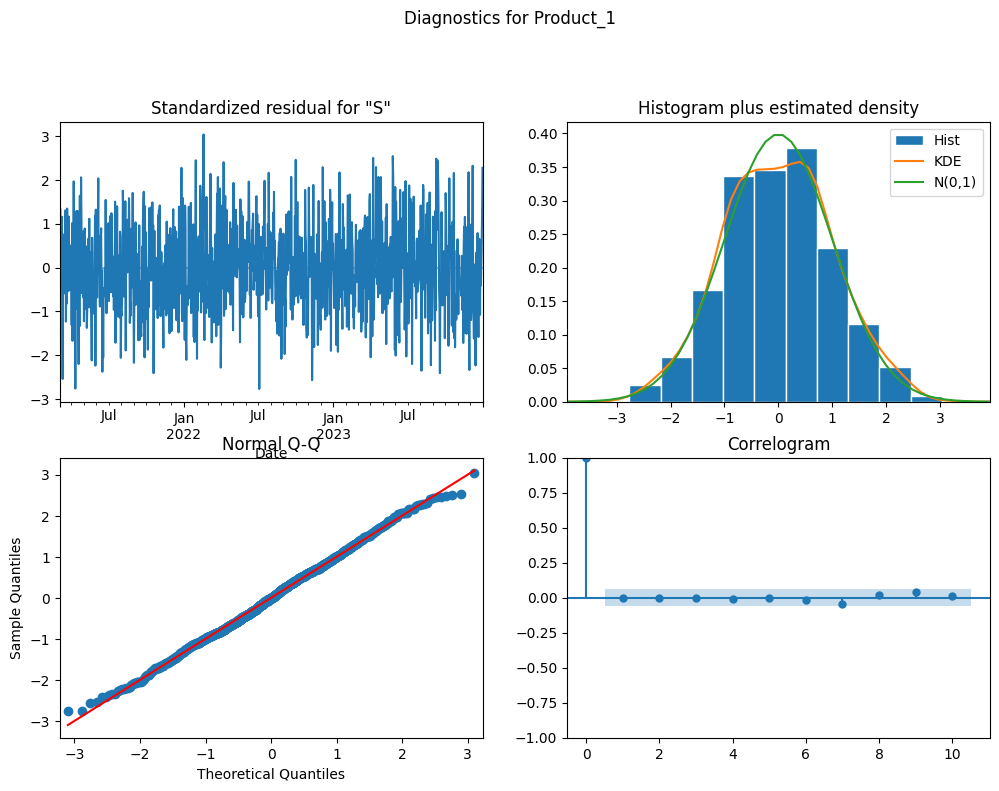

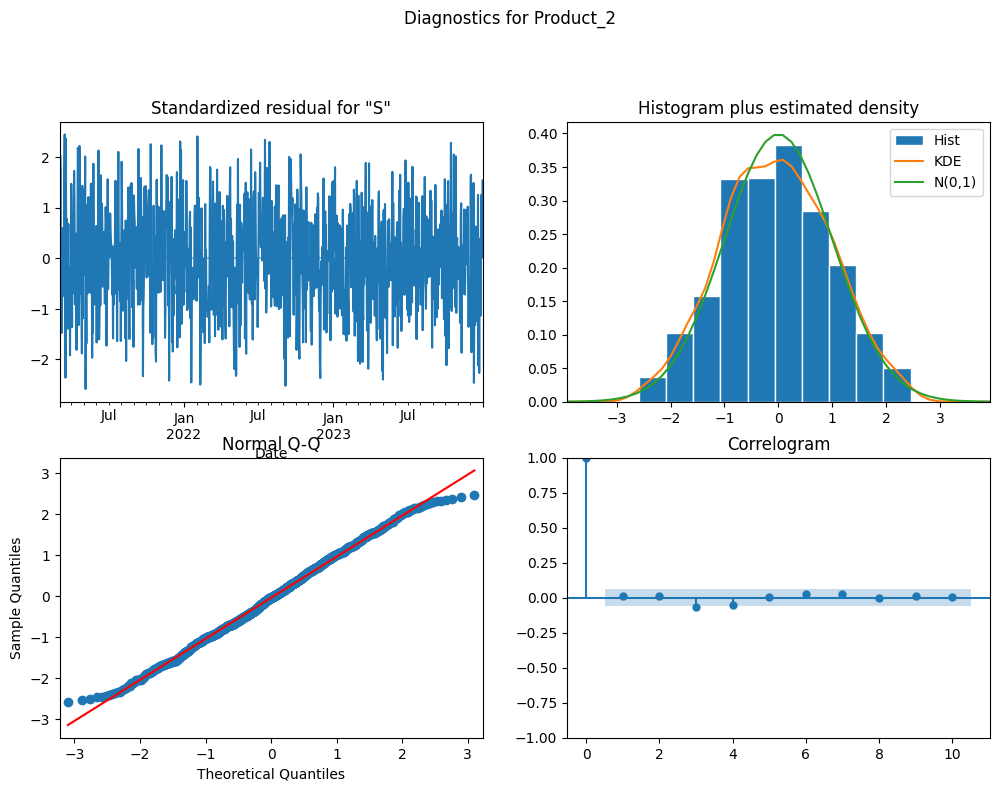

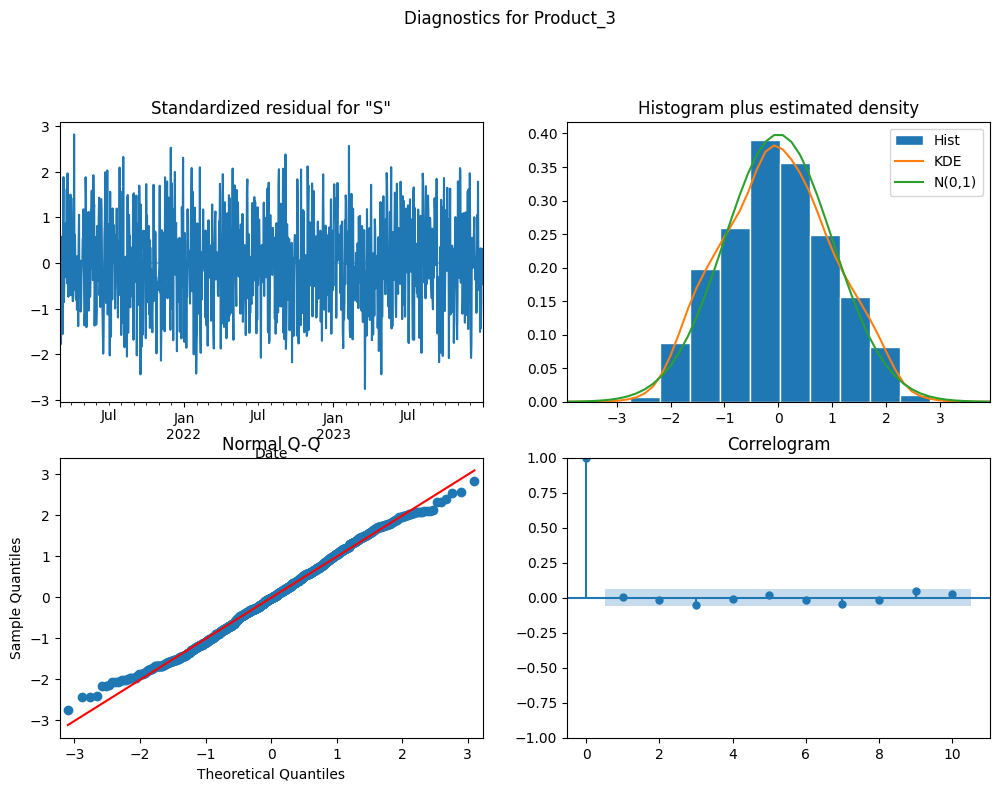

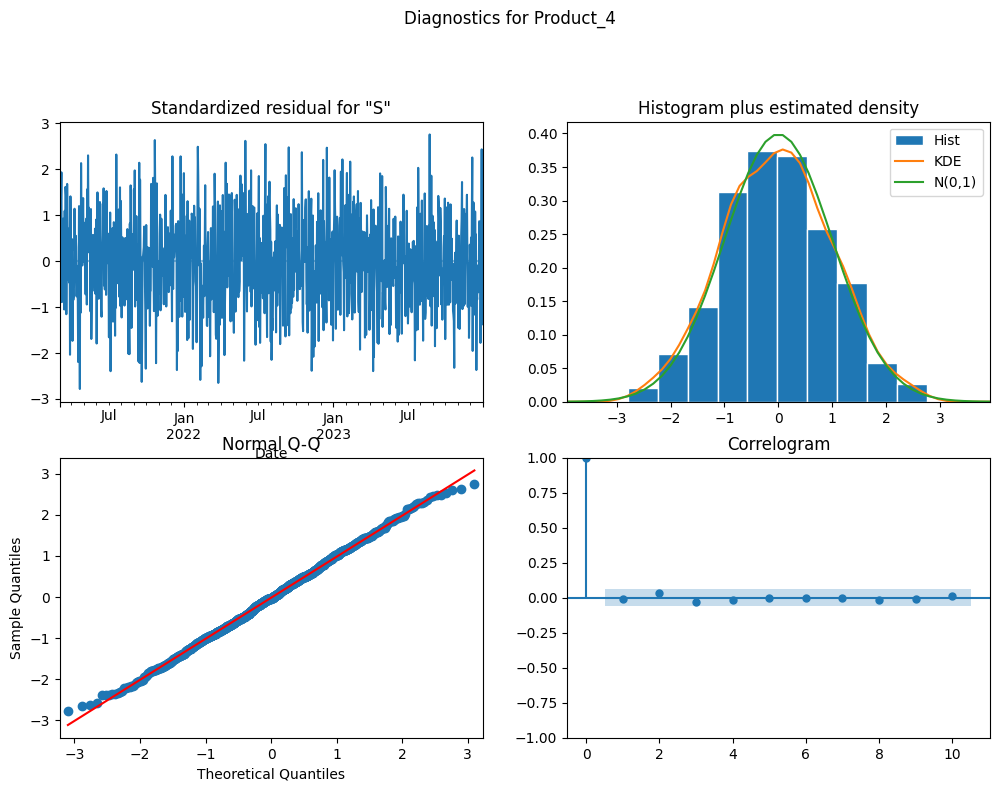

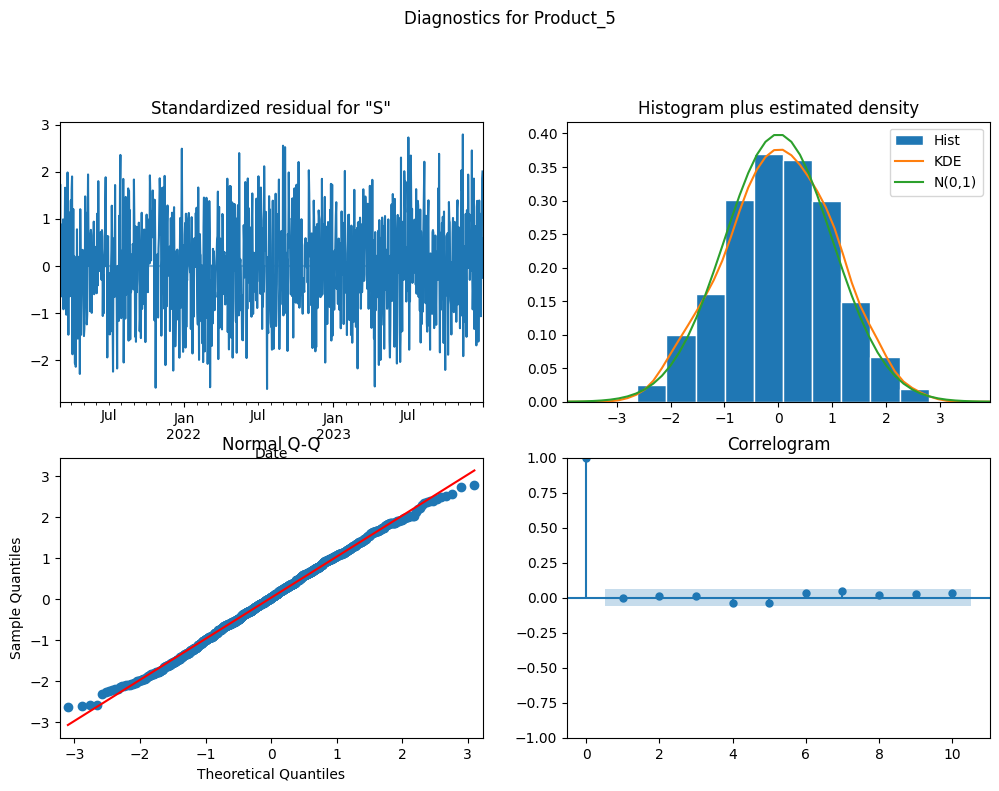

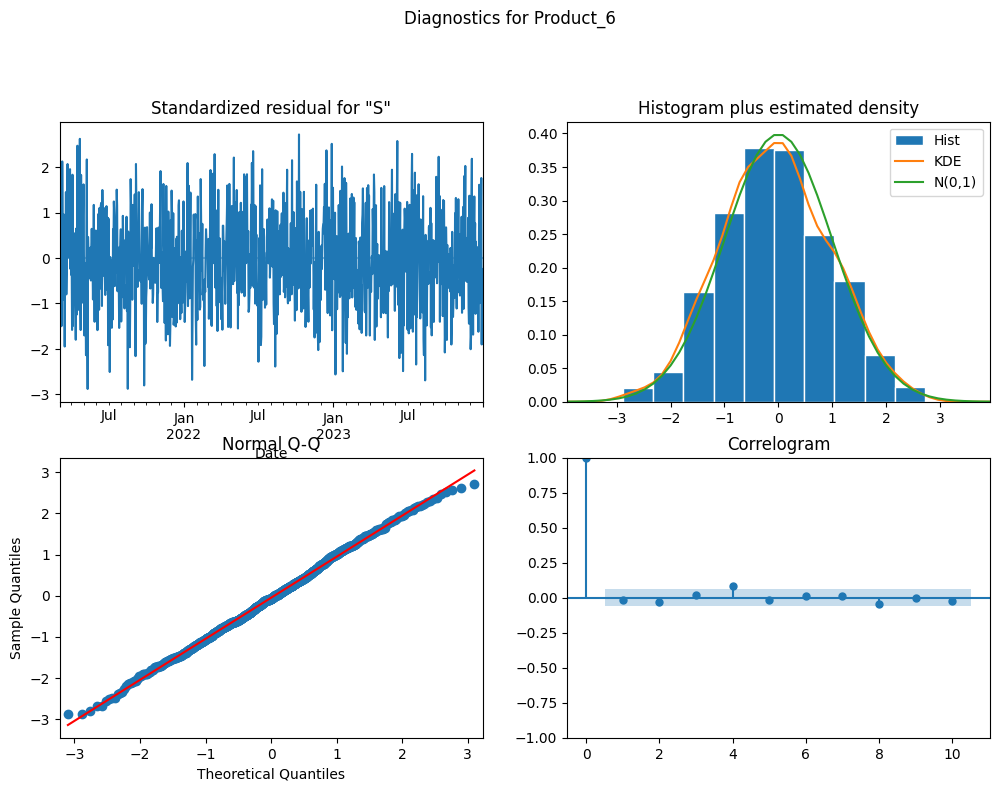

In [20]:
#code adapted from Chan`s Jupyter, 2020
for product, res in sarima_results.items():
    res.plot_diagnostics(figsize=(12,8))
    plt.suptitle(f'Diagnostics for {product}', y=1.02)
    plt.show()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16884.215, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=14455.648, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=15969.302, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=14174.028, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.84 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=13744.285, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13742.265, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13740.413, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=13742.282, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=13744.279, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.527 seconds
                               SA

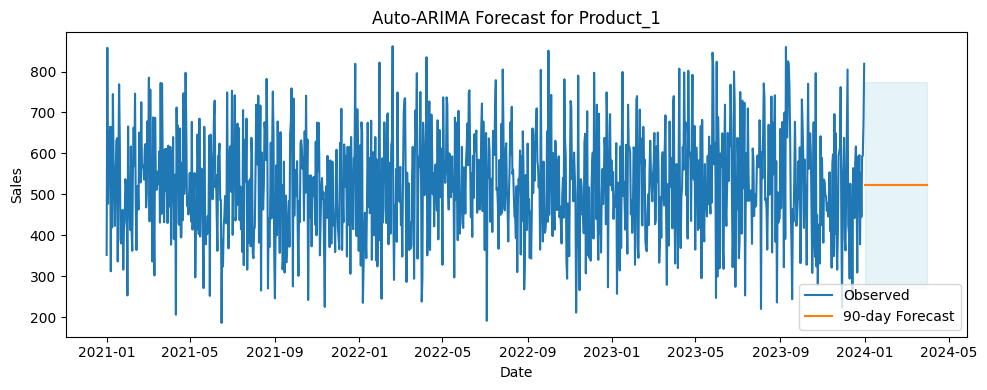

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15939.041, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=13584.654, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=15048.910, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=13309.365, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=13222.588, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.85 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=12885.998, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=12887.684, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=12887.922, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12889.679, Time=0.22 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 3.103 seconds
                               SARIMAX Results                                
Dep. Variable: 

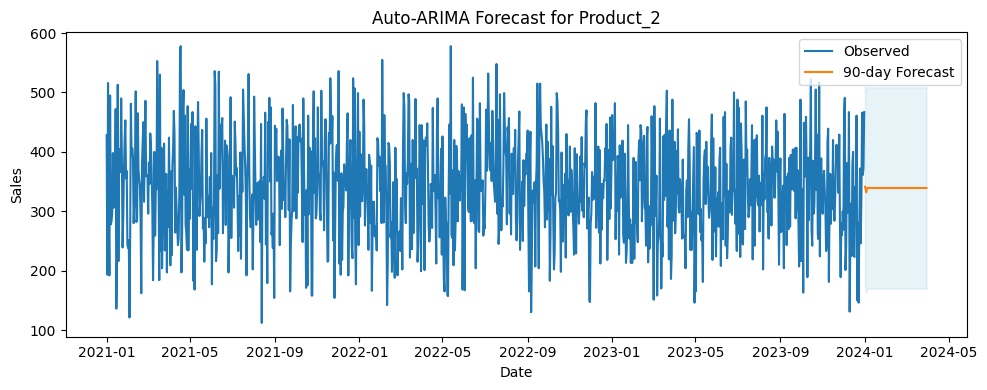

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15296.215, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=13003.235, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=14417.025, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=12747.068, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=12646.511, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.86 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=12299.919, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=12300.823, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=12301.917, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12302.983, Time=0.38 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 3.364 seconds
                               SARIMAX Results                                
Dep. Variable: 

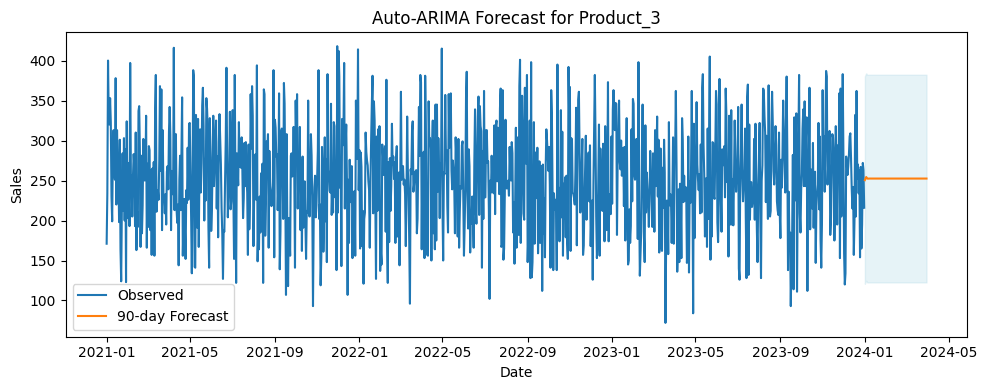

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14343.305, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=12154.570, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=13502.017, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11854.741, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=11758.484, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=11455.139, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11453.516, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11452.814, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11451.155, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11452.847, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11454.797, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] 

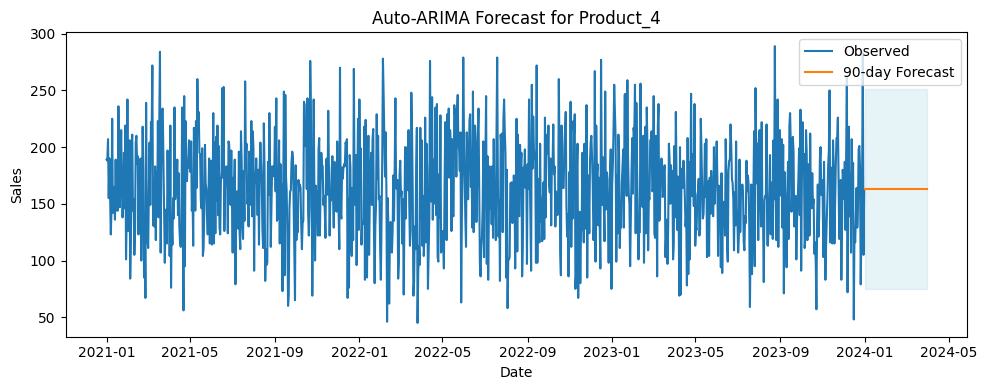

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13796.605, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11756.651, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12960.041, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11516.793, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=11383.091, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=11094.042, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11093.035, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11091.469, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11091.656, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11093.482, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11091.376, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   :

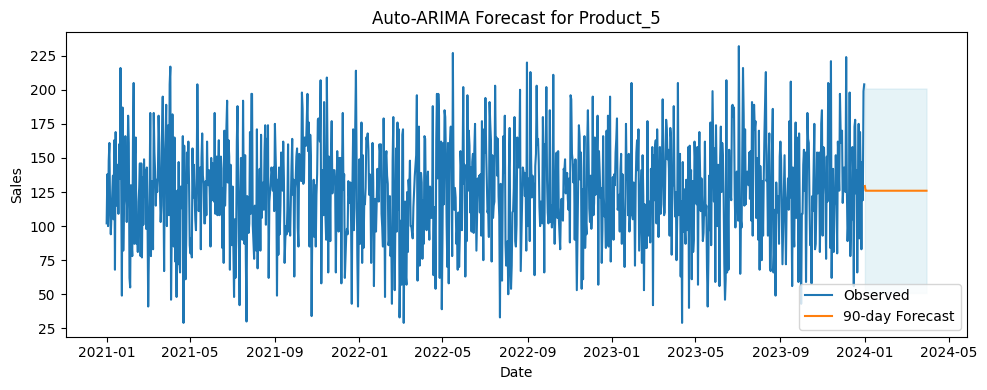

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12624.575, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=10925.108, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11925.366, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=10627.019, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=10491.825, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.84 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=10183.732, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=10181.914, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10179.983, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10180.107, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10181.979, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10179.957, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   :

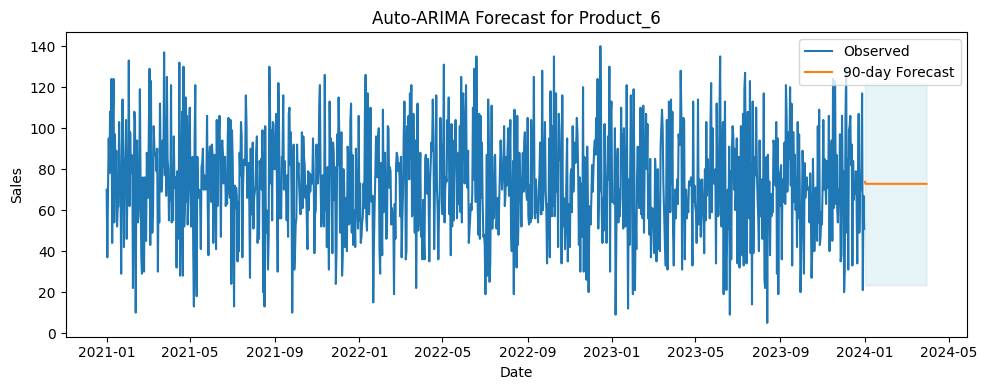

In [22]:
import pmdarima as pmd

for product in products:
    # Extract the time series for the current product
    ts = (merged_data[merged_data['Product'] == product]
          .groupby('Date')['Sales']
          .sum()
          .asfreq('D')
          .fillna(0))

    # code adapted from Mutha, 2023
    # Automatic ARIMA (no seasonal component)
    model = pmd.auto_arima(
        ts,
        start_p=1,
        max_p=3,
        start_q=1,
        max_q=3,
        test='adf',
        seasonal=False,
        trace=True,
        stepwise=True,
        suppress_warnings=True,
        information_criterion='aic'
    )

    print(model.summary())

    # Fit on the full series
    model.fit(ts)

    # Forecast next 90 days
    n_periods = 90
    forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

    # Build a date index for the forecast
    future_idx = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1),
                               periods=n_periods, freq='D')

    #code adapted from GeeksforGeeks, 2023
    # Put into a DataFrame for inspection or export
    pred_df_auto = pd.DataFrame({
        'Date': future_idx,
        'Forecast_Sales': forecast,
        'Lower_CI': conf_int[:, 0],
        'Upper_CI': conf_int[:, 1]
    })
    print(pred_df_auto.head())

    # Plot the forecast
    plt.figure(figsize=(10, 4))
    plt.plot(ts, label='Observed')
    plt.plot(future_idx, forecast, label=f'{n_periods}-day Forecast')  # <- FIX this to use `forecast`
    plt.fill_between(future_idx, conf_int[:, 0], conf_int[:, 1], color='lightblue', alpha=0.3)
    plt.title(f'Auto-ARIMA Forecast for {product}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.tight_layout()
    plt.show()
